# Baseball Analytics Overview: A Comprehensive Deep Dive

This notebook provides an in-depth exploration of baseball analytics using modern statistical approaches. We'll demonstrate why traditional metrics can be misleading and showcase the power of contemporary analytics in understanding player performance.

## Table of Contents
1. [Data Loading and Initial Setup](#1-data-loading-and-initial-setup)
2. [Traditional vs Modern Metrics Distribution Analysis](#2-traditional-vs-modern-metrics-distribution-analysis)
3. [Player Classification Analysis](#3-player-classification-analysis)
4. [Statistical Relationships and Correlations](#4-statistical-relationships-and-correlations)
5. [Outlier Detection and Analysis](#5-outlier-detection-and-analysis)
6. [Quality Contact and Statcast Analysis](#6-quality-contact-and-statcast-analysis)
7. [Situational Performance Analysis](#7-situational-performance-analysis)
8. [Advanced Metrics Deep Dive](#8-advanced-metrics-deep-dive)
9. [Educational Insights and Key Takeaways](#9-educational-insights-and-key-takeaways)

## 1. Data Loading and Initial Setup

Let's start by importing all necessary modules and setting up our visualization environment.

In [1]:
# Core imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Set up visualization styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Import our baseball analytics functions
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from baseball_stats import (
    get_modern_hitting_stats,
    get_modern_pitching_stats,
    demonstrate_stat_lies,
    analyze_hitter_types,
    quality_contact_analysis,
    get_player_story,
    quick_learning_examples,
    show_context_matters,
    tell_hitter_type_stories,
    find_stat_examples,
    get_elite_hitters,
    classify_hitter_type,
    classify_pitcher_type
)

print("✅ All imports successful!")
print("📊 Setting up for comprehensive baseball analytics analysis...")

✅ All imports successful!
📊 Setting up for comprehensive baseball analytics analysis...


### Load 2025 Season Data

Let's load the most recent season data for both hitting and pitching statistics.

In [2]:
# Load 2025 season data
print("📥 Loading 2025 hitting data...")
try:
    hitting_2025 = get_modern_hitting_stats(2025)
    print(f"✅ Successfully loaded {len(hitting_2025)} qualified hitters")
except Exception as e:
    print(f"⚠️ Error loading 2025 data: {e}")
    print("📥 Loading 2024 data as fallback...")
    hitting_2025 = get_modern_hitting_stats(2024)
    print(f"✅ Successfully loaded {len(hitting_2025)} qualified hitters from 2024")

print("📥 Loading pitching data...")
try:
    pitching_2025 = get_modern_pitching_stats(2025)
    print(f"✅ Successfully loaded {len(pitching_2025)} qualified pitchers")
except Exception as e:
    print(f"⚠️ Error loading 2025 pitching data: {e}")
    print("📥 Loading 2024 pitching data as fallback...")
    pitching_2025 = get_modern_pitching_stats(2024)
    print(f"✅ Successfully loaded {len(pitching_2025)} qualified pitchers from 2024")

# Display basic info about our datasets
print(f"\n📊 Dataset Summary:")
print(f"Hitting data: {len(hitting_2025)} qualified players")
print(f"Pitching data: {len(pitching_2025)} qualified players")

# Show first few rows of each dataset
print("\n🏏 Sample Hitting Data:")
display(hitting_2025.head())

print("\n⚾ Sample Pitching Data:")
display(pitching_2025.head())

📥 Loading 2025 hitting data...
Fetching 2025 hitting data...
✅ Successfully loaded 158 qualified hitters
📥 Loading pitching data...
Fetching 2025 pitching data...
✅ Successfully loaded 71 qualified pitchers

📊 Dataset Summary:
Hitting data: 158 qualified players
Pitching data: 71 qualified players

🏏 Sample Hitting Data:


,Name,Team,G,PA,AB,AVG,OBP,SLG,OPS,wRC+,...,HardHit%,Pull%,Cent%,Oppo%,R,RBI,HR,2B,3B,Hitter_Type
0,Aaron Judge,NYY,85,378,313,0.358,0.466,0.722,1.188,222,...,0.553,0.396,0.350,0.253,75,67,30,20,2,Elite Hitter
2,Cal Raleigh,SEA,84,371,312,0.272,0.383,0.641,1.024,184,...,0.493,0.552,0.267,0.181,60,71,33,16,0,Elite Hitter
1,Shohei Ohtani,LAD,84,389,331,0.287,0.387,0.637,1.024,175,...,0.611,0.489,0.361,0.150,83,55,30,12,7,Elite Hitter
14,Jeremy Pena,HOU,82,350,317,0.322,0.378,0.489,0.867,146,...,0.415,0.445,0.343,0.211,48,40,11,18,1,Elite Hitter
6,Kyle Tucker,CHC,84,374,317,0.290,0.393,0.533,0.926,156,...,0.457,0.468,0.326,0.206,61,52,17,18,4,Elite Hitter



⚾ Sample Pitching Data:


,Name,Team,G,GS,IP,ERA,FIP,WHIP,K/9,BB/9,...,BABIP,GB%,FB%,LOB%,ERA-,W,L,SV,Pitcher_Type,ERA_FIP_Diff
4,Tarik Skubal,DET,17,17,109.0,2.15,1.98,0.83,11.39,1.16,...,0.276,0.416,0.381,0.821,54,10,2,0,Power Pitcher,0.17
6,Garrett Crochet,BOS,18,18,115.1,2.26,2.55,1.03,11.24,2.50,...,0.284,0.478,0.362,0.819,53,8,4,0,Power Pitcher,-0.29
10,Logan Webb,SFG,18,18,113.2,2.61,2.31,1.14,10.06,1.90,...,0.328,0.531,0.231,0.776,66,7,6,0,Power Pitcher,0.30
1,Paul Skenes,PIT,18,18,111.0,2.03,2.49,0.92,9.32,2.43,...,0.243,0.479,0.332,0.786,49,4,7,0,Effective Pitcher,-0.46
7,Zack Wheeler,PHI,17,17,107.0,2.27,2.54,0.91,11.44,2.10,...,0.259,0.391,0.379,0.826,55,8,3,0,Power Pitcher,-0.27


## 2. Traditional vs Modern Metrics Distribution Analysis

Let's explore how traditional metrics compare to modern analytics and why the modern approach provides more meaningful insights.

### Hitting Metrics Comparison

We'll compare traditional hitting metrics (AVG, RBI) with modern metrics (wRC+, OPS, K-BB%).

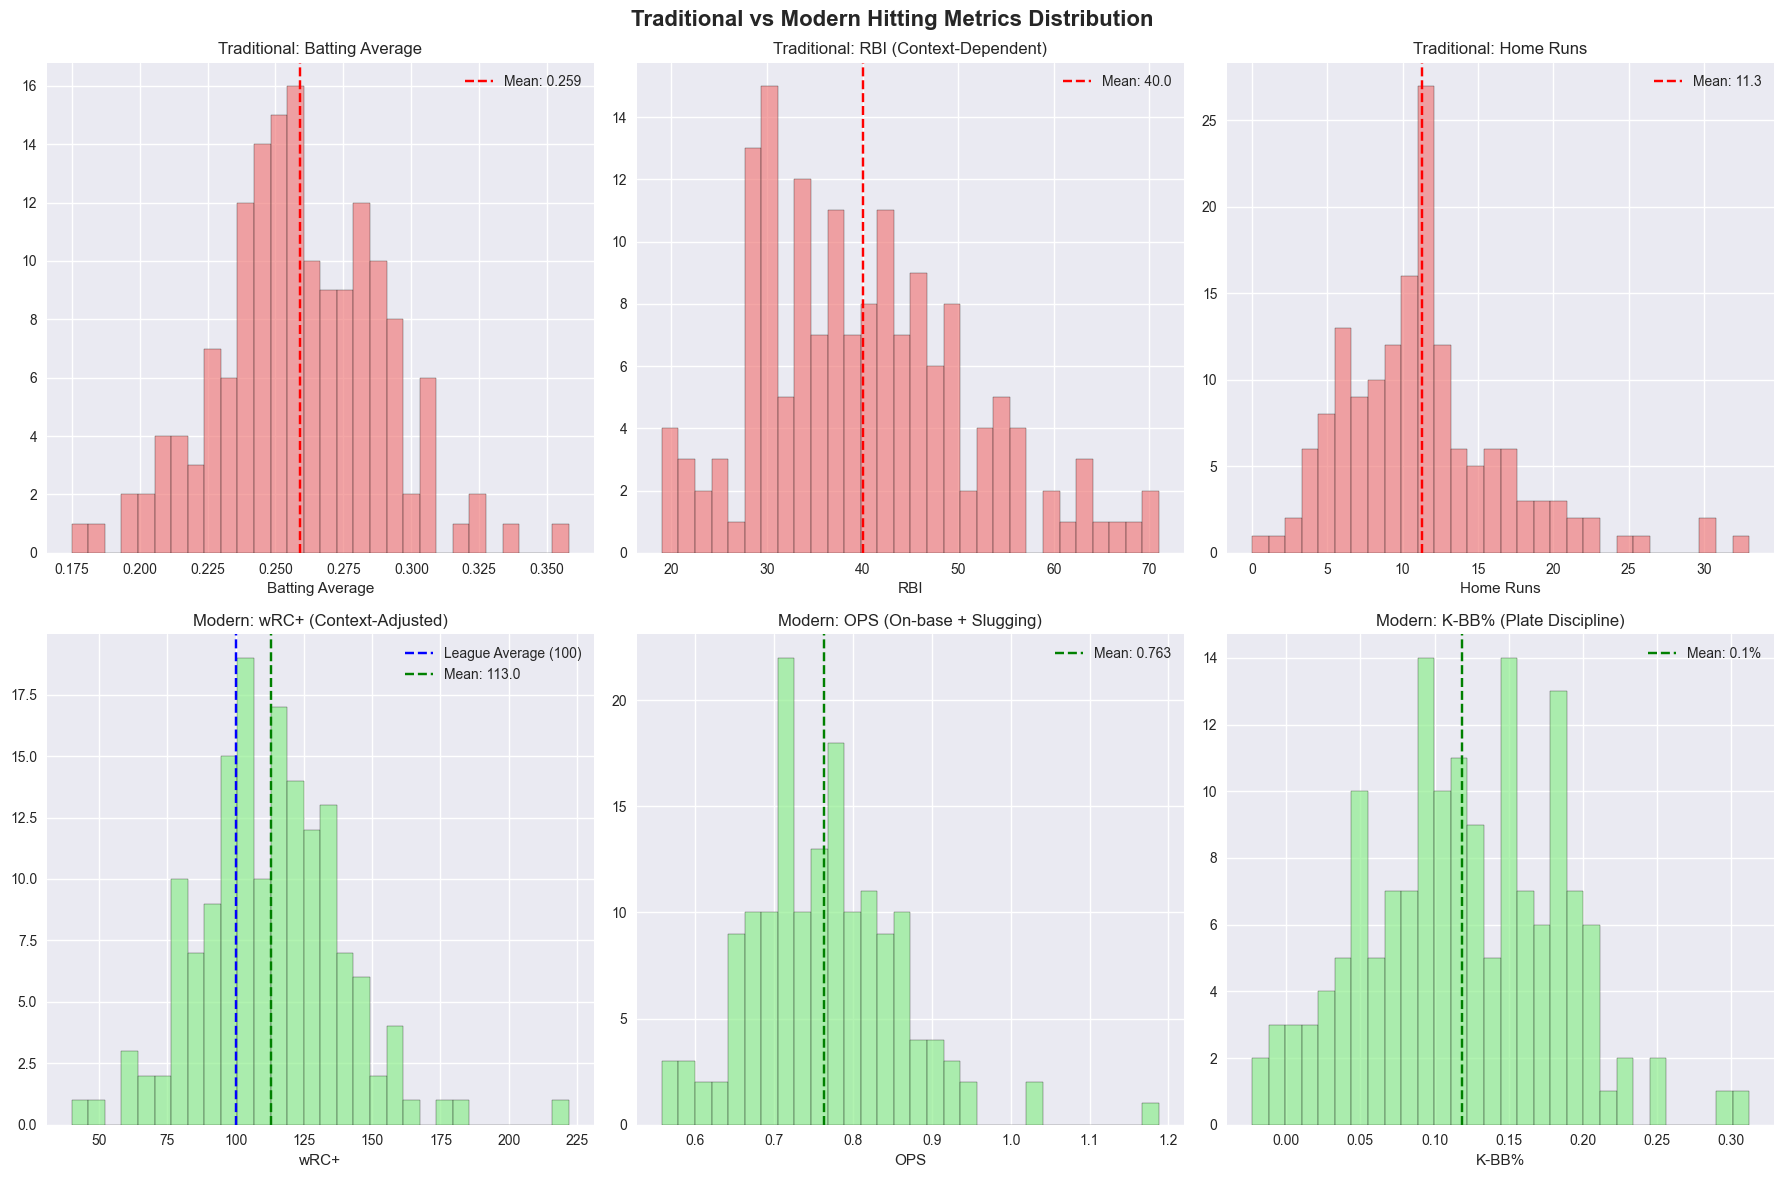


📊 Key Insights:
• Traditional metrics like BA and RBI are heavily influenced by context and luck
• Modern metrics like wRC+ are park and league adjusted, showing true offensive value
• K-BB% reveals plate discipline independent of results


In [3]:
# Create comprehensive hitting metrics comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Traditional vs Modern Hitting Metrics Distribution', fontsize=16, fontweight='bold')

# Traditional metrics
if 'AVG' in hitting_2025.columns:
    axes[0, 0].hist(hitting_2025['AVG'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 0].set_title('Traditional: Batting Average')
    axes[0, 0].set_xlabel('Batting Average')
    axes[0, 0].axvline(hitting_2025['AVG'].mean(), color='red', linestyle='--', label=f'Mean: {hitting_2025["AVG"].mean():.3f}')
    axes[0, 0].legend()

if 'RBI' in hitting_2025.columns:
    axes[0, 1].hist(hitting_2025['RBI'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Traditional: RBI (Context-Dependent)')
    axes[0, 1].set_xlabel('RBI')
    axes[0, 1].axvline(hitting_2025['RBI'].mean(), color='red', linestyle='--', label=f'Mean: {hitting_2025["RBI"].mean():.1f}')
    axes[0, 1].legend()

if 'HR' in hitting_2025.columns:
    axes[0, 2].hist(hitting_2025['HR'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 2].set_title('Traditional: Home Runs')
    axes[0, 2].set_xlabel('Home Runs')
    axes[0, 2].axvline(hitting_2025['HR'].mean(), color='red', linestyle='--', label=f'Mean: {hitting_2025["HR"].mean():.1f}')
    axes[0, 2].legend()

# Modern metrics
if 'wRC+' in hitting_2025.columns:
    axes[1, 0].hist(hitting_2025['wRC+'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Modern: wRC+ (Context-Adjusted)')
    axes[1, 0].set_xlabel('wRC+')
    axes[1, 0].axvline(100, color='blue', linestyle='--', label='League Average (100)')
    axes[1, 0].axvline(hitting_2025['wRC+'].mean(), color='green', linestyle='--', label=f'Mean: {hitting_2025["wRC+"].mean():.1f}')
    axes[1, 0].legend()

if 'OPS' in hitting_2025.columns:
    axes[1, 1].hist(hitting_2025['OPS'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 1].set_title('Modern: OPS (On-base + Slugging)')
    axes[1, 1].set_xlabel('OPS')
    axes[1, 1].axvline(hitting_2025['OPS'].mean(), color='green', linestyle='--', label=f'Mean: {hitting_2025["OPS"].mean():.3f}')
    axes[1, 1].legend()

# Calculate K-BB% if not present
if 'K%' in hitting_2025.columns and 'BB%' in hitting_2025.columns:
    hitting_2025['K-BB%'] = hitting_2025['K%'] - hitting_2025['BB%']
    axes[1, 2].hist(hitting_2025['K-BB%'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 2].set_title('Modern: K-BB% (Plate Discipline)')
    axes[1, 2].set_xlabel('K-BB%')
    axes[1, 2].axvline(hitting_2025['K-BB%'].mean(), color='green', linestyle='--', label=f'Mean: {hitting_2025["K-BB%"].mean():.1f}%')
    axes[1, 2].legend()

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print("• Traditional metrics like BA and RBI are heavily influenced by context and luck")
print("• Modern metrics like wRC+ are park and league adjusted, showing true offensive value")
print("• K-BB% reveals plate discipline independent of results")

### Pitching Metrics Comparison

Let's examine how traditional pitching metrics compare to FIP and other skill-based metrics.

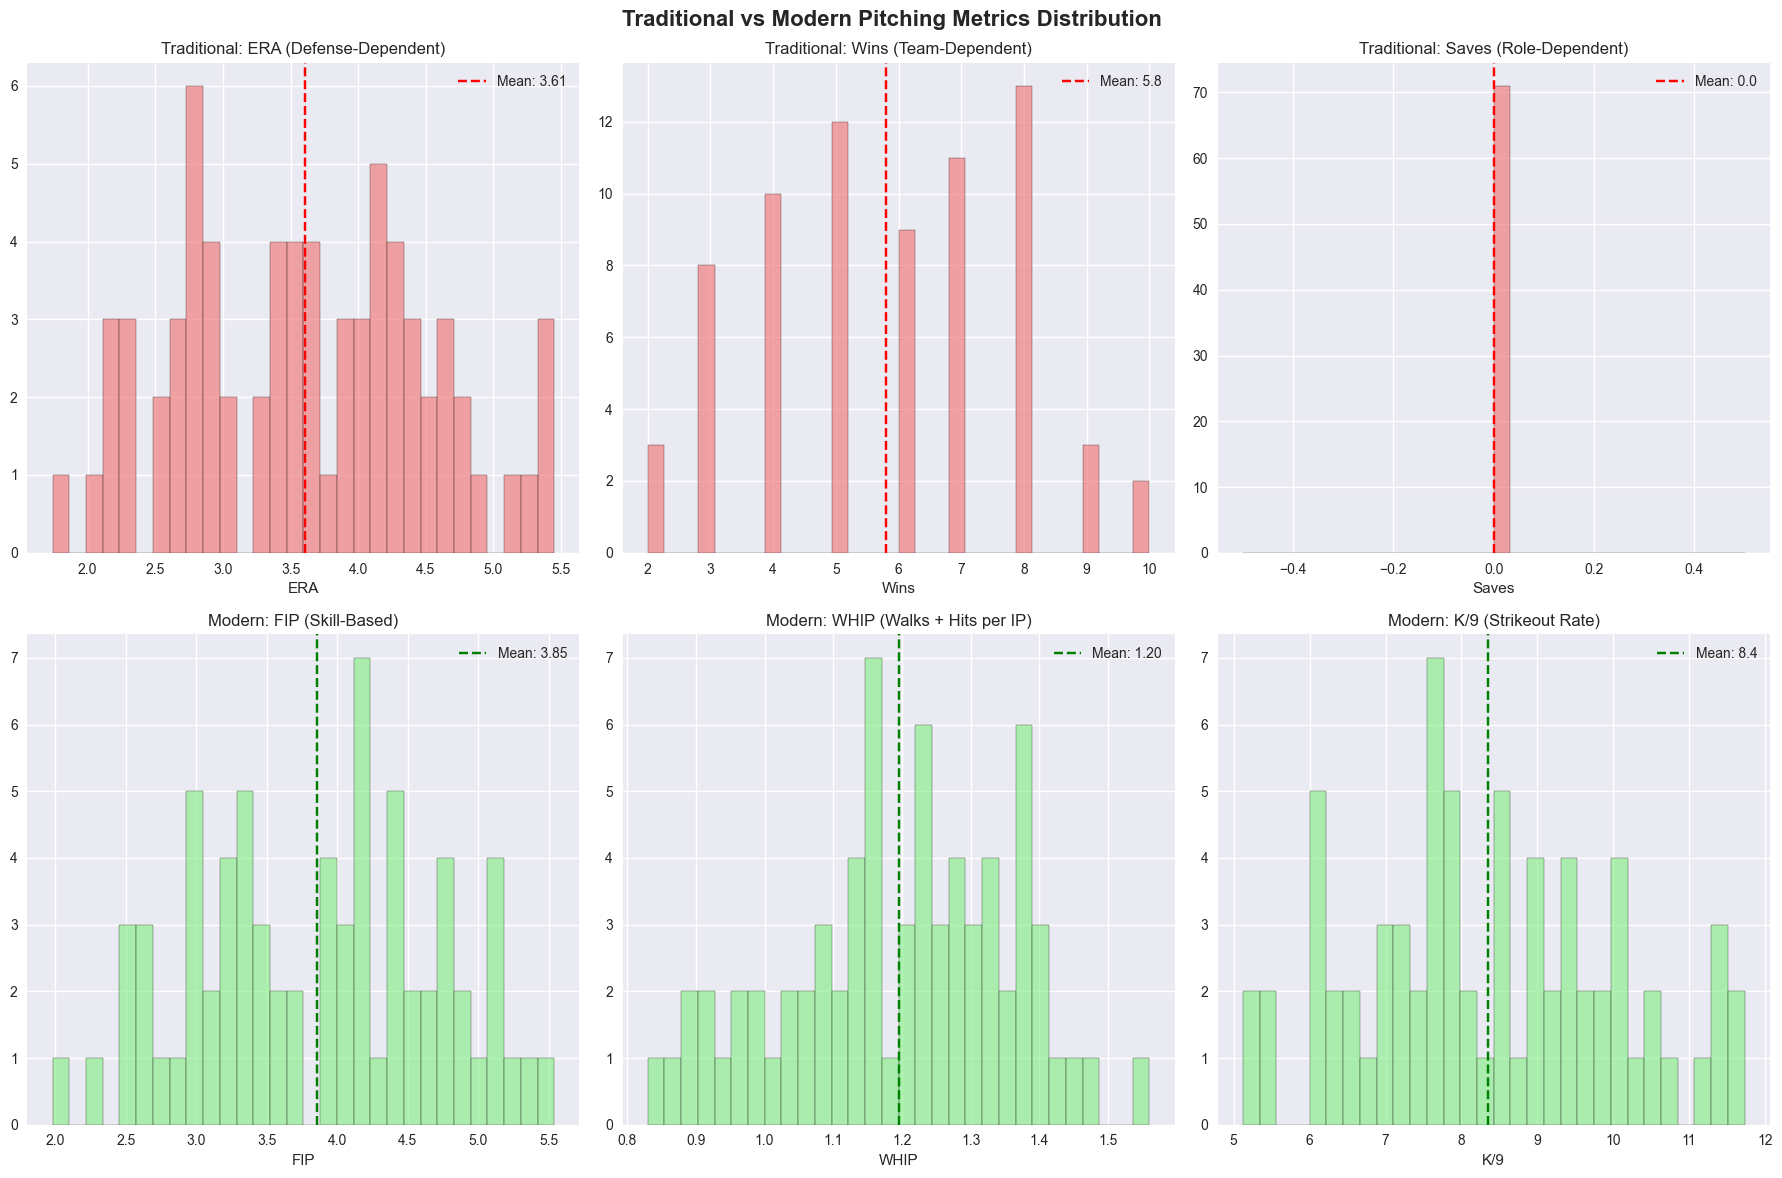


📊 Key Insights:
• ERA is influenced by defense and luck, while FIP measures true pitching skill
• Wins and saves are team/role dependent, not indicators of individual performance
• K/9 and WHIP better reflect a pitcher's actual ability


In [4]:
# Create pitching metrics comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Traditional vs Modern Pitching Metrics Distribution', fontsize=16, fontweight='bold')

# Traditional metrics
if 'ERA' in pitching_2025.columns:
    axes[0, 0].hist(pitching_2025['ERA'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 0].set_title('Traditional: ERA (Defense-Dependent)')
    axes[0, 0].set_xlabel('ERA')
    axes[0, 0].axvline(pitching_2025['ERA'].mean(), color='red', linestyle='--', label=f'Mean: {pitching_2025["ERA"].mean():.2f}')
    axes[0, 0].legend()

if 'W' in pitching_2025.columns:
    axes[0, 1].hist(pitching_2025['W'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Traditional: Wins (Team-Dependent)')
    axes[0, 1].set_xlabel('Wins')
    axes[0, 1].axvline(pitching_2025['W'].mean(), color='red', linestyle='--', label=f'Mean: {pitching_2025["W"].mean():.1f}')
    axes[0, 1].legend()

if 'SV' in pitching_2025.columns:
    axes[0, 2].hist(pitching_2025['SV'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 2].set_title('Traditional: Saves (Role-Dependent)')
    axes[0, 2].set_xlabel('Saves')
    axes[0, 2].axvline(pitching_2025['SV'].mean(), color='red', linestyle='--', label=f'Mean: {pitching_2025["SV"].mean():.1f}')
    axes[0, 2].legend()

# Modern metrics
if 'FIP' in pitching_2025.columns:
    axes[1, 0].hist(pitching_2025['FIP'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Modern: FIP (Skill-Based)')
    axes[1, 0].set_xlabel('FIP')
    axes[1, 0].axvline(pitching_2025['FIP'].mean(), color='green', linestyle='--', label=f'Mean: {pitching_2025["FIP"].mean():.2f}')
    axes[1, 0].legend()

if 'WHIP' in pitching_2025.columns:
    axes[1, 1].hist(pitching_2025['WHIP'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 1].set_title('Modern: WHIP (Walks + Hits per IP)')
    axes[1, 1].set_xlabel('WHIP')
    axes[1, 1].axvline(pitching_2025['WHIP'].mean(), color='green', linestyle='--', label=f'Mean: {pitching_2025["WHIP"].mean():.2f}')
    axes[1, 1].legend()

if 'K/9' in pitching_2025.columns:
    axes[1, 2].hist(pitching_2025['K/9'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 2].set_title('Modern: K/9 (Strikeout Rate)')
    axes[1, 2].set_xlabel('K/9')
    axes[1, 2].axvline(pitching_2025['K/9'].mean(), color='green', linestyle='--', label=f'Mean: {pitching_2025["K/9"].mean():.1f}')
    axes[1, 2].legend()

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print("• ERA is influenced by defense and luck, while FIP measures true pitching skill")
print("• Wins and saves are team/role dependent, not indicators of individual performance")
print("• K/9 and WHIP better reflect a pitcher's actual ability")

### Interactive Distribution Comparison

Let's create an interactive comparison using Plotly to better understand the distributions.

In [5]:
# Create interactive distribution comparison for hitting
if 'AVG' in hitting_2025.columns and 'wRC+' in hitting_2025.columns:
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Batting Average vs wRC+', 'Traditional vs Modern Scatter', 
                       'Performance Distribution', 'Metric Correlation'),
        specs=[[{"secondary_y": True}, {"type": "scatter"}],
               [{"type": "histogram"}, {"type": "scatter"}]]
    )
    
    # Add distribution plots
    fig.add_trace(
        go.Histogram(x=hitting_2025['AVG'], name='Batting Average', opacity=0.7, nbinsx=30, marker_color='red'),
        row=1, col=1
    )
    fig.add_trace(
        go.Histogram(x=hitting_2025['wRC+'], name='wRC+', opacity=0.7, nbinsx=30, marker_color='green', yaxis='y2'),
        row=1, col=1, secondary_y=True
    )
    
    # Add scatter plot comparison
    fig.add_trace(
        go.Scatter(
            x=hitting_2025['AVG'], 
            y=hitting_2025['wRC+'],
            mode='markers',
            name='BA vs wRC+',
            text=hitting_2025['Name'] if 'Name' in hitting_2025.columns else None,
            hovertemplate='<b>%{text}</b><br>BA: %{x:.3f}<br>wRC+: %{y:.0f}<extra></extra>',
            marker=dict(size=8, color='blue', opacity=0.6)
        ),
        row=1, col=2
    )
    
    # Performance tiers
    performance_tiers = pd.cut(hitting_2025['wRC+'], bins=[0, 80, 100, 120, 200], 
                              labels=['Below Avg', 'Average', 'Good', 'Elite'])
    tier_counts = performance_tiers.value_counts()
    
    fig.add_trace(
        go.Bar(
            x=tier_counts.index,
            y=tier_counts.values,
            name='Performance Tiers',
            marker_color=['red', 'yellow', 'lightgreen', 'green']
        ),
        row=2, col=1
    )
    
    # Create correlation matrix for available metrics
    if 'OPS' in hitting_2025.columns:
        fig.add_trace(
            go.Scatter(
                x=hitting_2025['OPS'],
                y=hitting_2025['wRC+'],
                mode='markers',
                name='OPS vs wRC+',
                marker=dict(size=8, color='purple', opacity=0.6),
                hovertemplate='OPS: %{x:.3f}<br>wRC+: %{y:.0f}<extra></extra>'
            ),
            row=2, col=2
        )
    
    fig.update_layout(
        title='Interactive Analysis: Traditional vs Modern Metrics',
        height=800,
        showlegend=True
    )
    
    fig.show()
    
    print("\n🎯 Interactive Features:")
    print("• Hover over data points to see player details")
    print("• Use zoom and pan to explore relationships")
    print("• Toggle traces on/off using the legend")
else:
    print("Required columns not available for interactive analysis")


🎯 Interactive Features:
• Hover over data points to see player details
• Use zoom and pan to explore relationships
• Toggle traces on/off using the legend


## 3. Player Classification Analysis

Let's analyze how players are classified into different types and visualize the distribution of these classifications.

🔍 Analyzing hitter types...


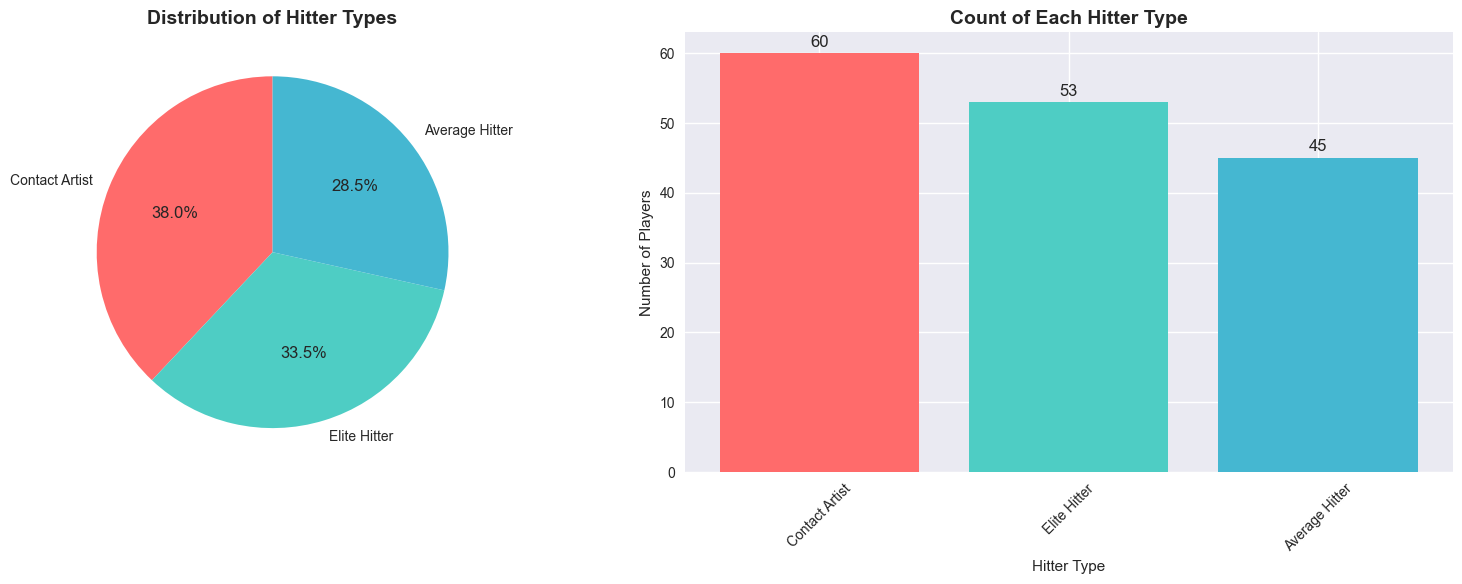


📊 Player Classification Summary:
• Contact Artist: 60 players (38.0%)
• Elite Hitter: 53 players (33.5%)
• Average Hitter: 45 players (28.5%)

📊 Average Stats by Hitter Type:


,wRC+,K%,BB%,ISO,OPS
Hitter_Type,,,,,
Average Hitter,103.400,0.229,0.080,0.181,0.735
Contact Artist,96.433,0.187,0.084,0.121,0.697
Elite Hitter,139.887,0.214,0.104,0.225,0.862


In [6]:
# Get player classifications
print("🔍 Analyzing hitter types...")

# Check if Hitter_Type column exists, if not create it
if 'Hitter_Type' not in hitting_2025.columns:
    hitting_2025['Hitter_Type'] = hitting_2025.apply(classify_hitter_type, axis=1)

# Count each type
type_counts = hitting_2025['Hitter_Type'].value_counts()

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
wedges, texts, autotexts = ax1.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
                                   colors=colors[:len(type_counts)], startangle=90)
ax1.set_title('Distribution of Hitter Types', fontsize=14, fontweight='bold')

# Bar chart
bars = ax2.bar(type_counts.index, type_counts.values, color=colors[:len(type_counts)])
ax2.set_title('Count of Each Hitter Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Hitter Type')
ax2.set_ylabel('Number of Players')
ax2.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n📊 Player Classification Summary:")
total_players = len(hitting_2025)
for player_type, count in type_counts.items():
    percentage = (count / total_players) * 100
    print(f"• {player_type}: {count} players ({percentage:.1f}%)")

# Show average stats by type
print("\n📊 Average Stats by Hitter Type:")
type_analysis = analyze_hitter_types(hitting_2025)
display(type_analysis)

### Hitter Type Characteristics Analysis

Let's create radar charts to show the characteristics of each hitter type.

In [7]:
# Create radar charts for different hitter types using promoted function
from baseball_stats import create_hitter_radar_chart

# Create the radar chart
radar_fig = create_hitter_radar_chart()
radar_fig.show()

print("\n🎯 Hitter Type Characteristics:")
print("• Three True Outcomes: High power, low contact, good patience")
print("• Contact Artist: Low power, high contact, good speed")
print("• Elite Hitter: High in all categories")
print("• Average Hitter: League average in all areas")


🎯 Hitter Type Characteristics:
• Three True Outcomes: High power, low contact, good patience
• Contact Artist: Low power, high contact, good speed
• Elite Hitter: High in all categories
• Average Hitter: League average in all areas


## 4. Statistical Relationships and Correlations

Let's explore the relationships between different metrics and identify which traditional stats correlate best with modern analytics.

In [8]:
# Create comprehensive correlation analysis using promoted function
from baseball_stats import create_correlation_heatmap

# Define key metrics for analysis
hitting_metrics = ['AVG', 'OBP', 'SLG', 'OPS', 'wRC+', 'HR', 'RBI', 'K%', 'BB%', 'ISO', 'BABIP']
pitching_metrics = ['ERA', 'FIP', 'WHIP', 'K/9', 'BB/9', 'K%', 'BB%', 'BABIP', 'LOB%', 'HR/9', 'W', 'SV']

# Create hitting correlation heatmap
print("📊 Analyzing hitting metric correlations...")
hitting_corr_fig, hitting_corr_matrix = create_correlation_heatmap(
    hitting_2025, "Hitting Metrics Correlation Matrix", hitting_metrics
)
hitting_corr_fig.show()

# Create pitching correlation heatmap
print("📊 Analyzing pitching metric correlations...")
pitching_corr_fig, pitching_corr_matrix = create_correlation_heatmap(
    pitching_2025, "Pitching Metrics Correlation Matrix", pitching_metrics
)
pitching_corr_fig.show()

📊 Analyzing hitting metric correlations...


📊 Analyzing pitching metric correlations...


### Key Metric Relationships

Let's examine specific relationships between traditional and modern metrics.

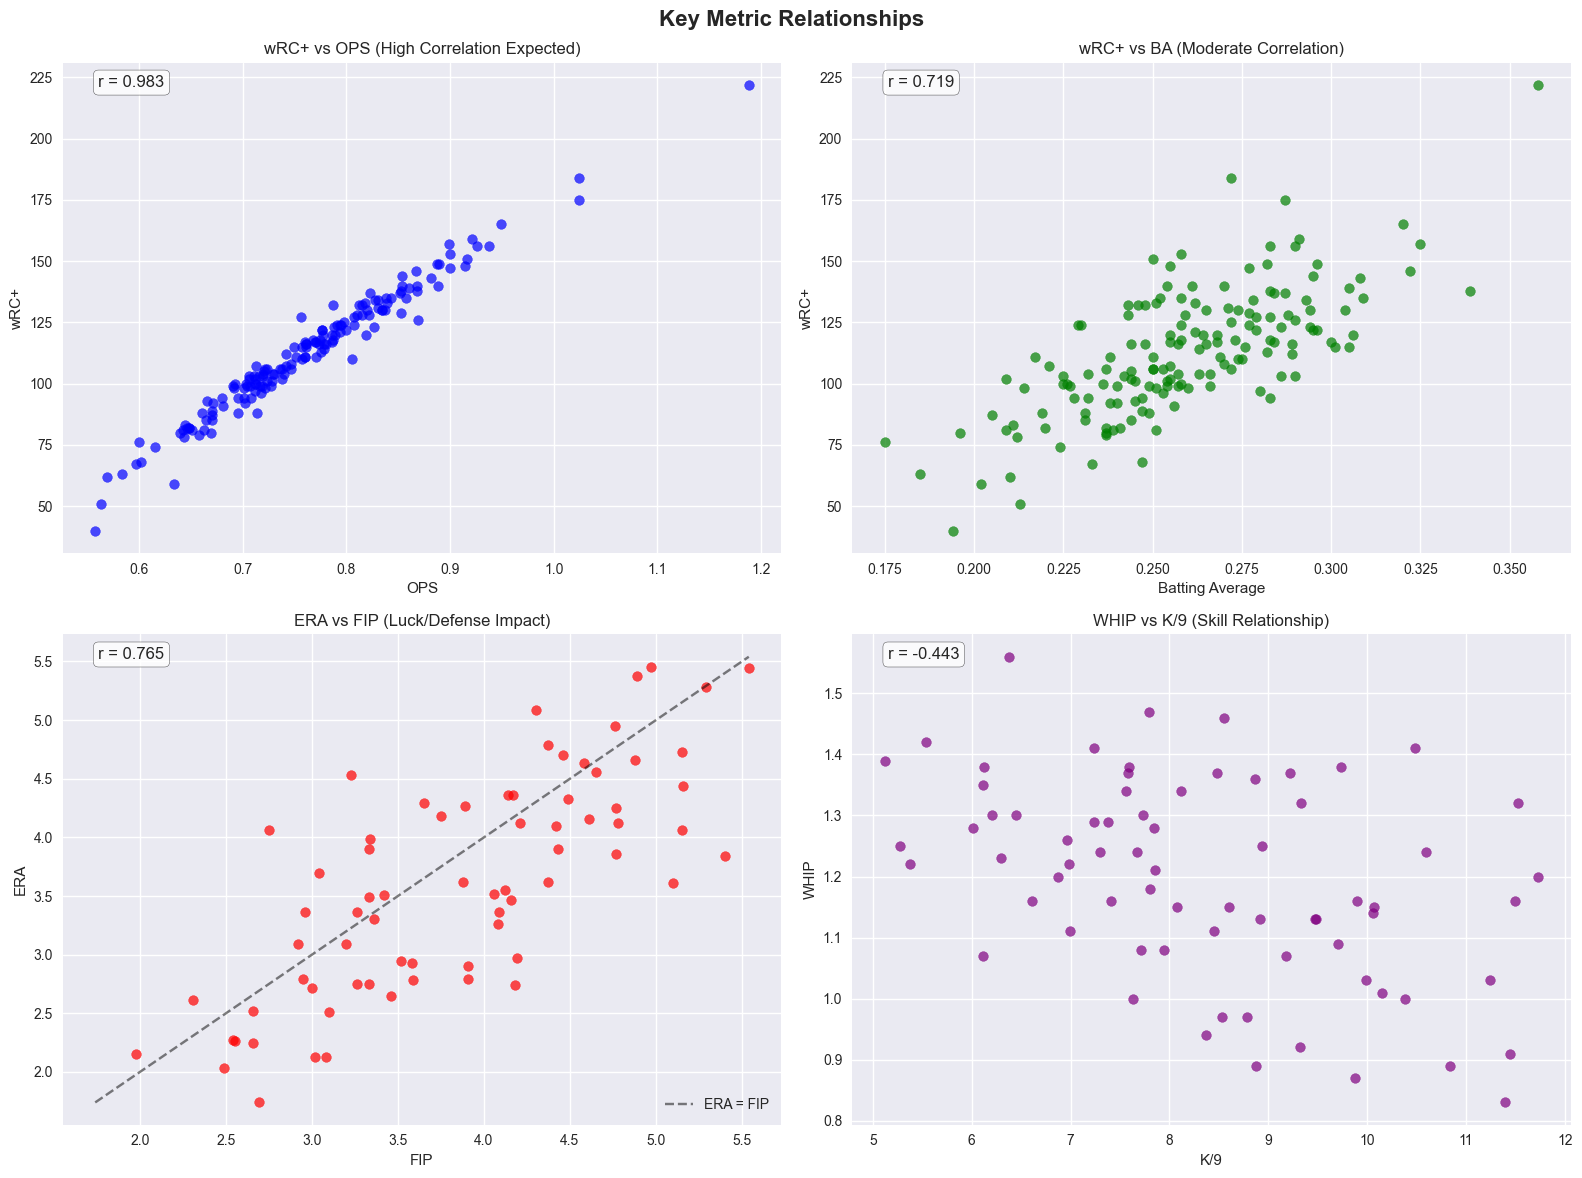


🔍 Relationship Analysis:
• Strong correlations indicate metrics measure similar skills
• Weak correlations suggest different aspects of performance
• ERA-FIP differences show luck and defensive influence
• Traditional stats often correlate moderately with modern analytics


In [9]:
# Create scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Key Metric Relationships', fontsize=16, fontweight='bold')

# wRC+ vs OPS (should be highly correlated)
if 'wRC+' in hitting_2025.columns and 'OPS' in hitting_2025.columns:
    axes[0, 0].scatter(hitting_2025['OPS'], hitting_2025['wRC+'], alpha=0.7, color='blue')
    axes[0, 0].set_xlabel('OPS')
    axes[0, 0].set_ylabel('wRC+')
    axes[0, 0].set_title('wRC+ vs OPS (High Correlation Expected)')
    
    # Add correlation coefficient
    correlation = hitting_2025['OPS'].corr(hitting_2025['wRC+'])
    axes[0, 0].text(0.05, 0.95, f'r = {correlation:.3f}', transform=axes[0, 0].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# AVG vs wRC+ (should be moderately correlated)
if 'AVG' in hitting_2025.columns and 'wRC+' in hitting_2025.columns:
    axes[0, 1].scatter(hitting_2025['AVG'], hitting_2025['wRC+'], alpha=0.7, color='green')
    axes[0, 1].set_xlabel('Batting Average')
    axes[0, 1].set_ylabel('wRC+')
    axes[0, 1].set_title('wRC+ vs BA (Moderate Correlation)')
    
    correlation = hitting_2025['AVG'].corr(hitting_2025['wRC+'])
    axes[0, 1].text(0.05, 0.95, f'r = {correlation:.3f}', transform=axes[0, 1].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# ERA vs FIP (should show luck/defense influence)
if 'ERA' in pitching_2025.columns and 'FIP' in pitching_2025.columns:
    axes[1, 0].scatter(pitching_2025['FIP'], pitching_2025['ERA'], alpha=0.7, color='red')
    axes[1, 0].set_xlabel('FIP')
    axes[1, 0].set_ylabel('ERA')
    axes[1, 0].set_title('ERA vs FIP (Luck/Defense Impact)')
    
    # Add diagonal line (ERA = FIP)
    min_val = min(pitching_2025['FIP'].min(), pitching_2025['ERA'].min())
    max_val = max(pitching_2025['FIP'].max(), pitching_2025['ERA'].max())
    axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='ERA = FIP')
    axes[1, 0].legend()
    
    correlation = pitching_2025['FIP'].corr(pitching_2025['ERA'])
    axes[1, 0].text(0.05, 0.95, f'r = {correlation:.3f}', transform=axes[1, 0].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# K/9 vs WHIP (skill-based relationship)
if 'K/9' in pitching_2025.columns and 'WHIP' in pitching_2025.columns:
    axes[1, 1].scatter(pitching_2025['K/9'], pitching_2025['WHIP'], alpha=0.7, color='purple')
    axes[1, 1].set_xlabel('K/9')
    axes[1, 1].set_ylabel('WHIP')
    axes[1, 1].set_title('WHIP vs K/9 (Skill Relationship)')
    
    correlation = pitching_2025['K/9'].corr(pitching_2025['WHIP'])
    axes[1, 1].text(0.05, 0.95, f'r = {correlation:.3f}', transform=axes[1, 1].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n🔍 Relationship Analysis:")
print("• Strong correlations indicate metrics measure similar skills")
print("• Weak correlations suggest different aspects of performance")
print("• ERA-FIP differences show luck and defensive influence")
print("• Traditional stats often correlate moderately with modern analytics")

## 5. Outlier Detection and Analysis

Let's identify players who are over or under-performing their expected metrics using luck indicators.


⚾ ERA-FIP Outliers: 0 players


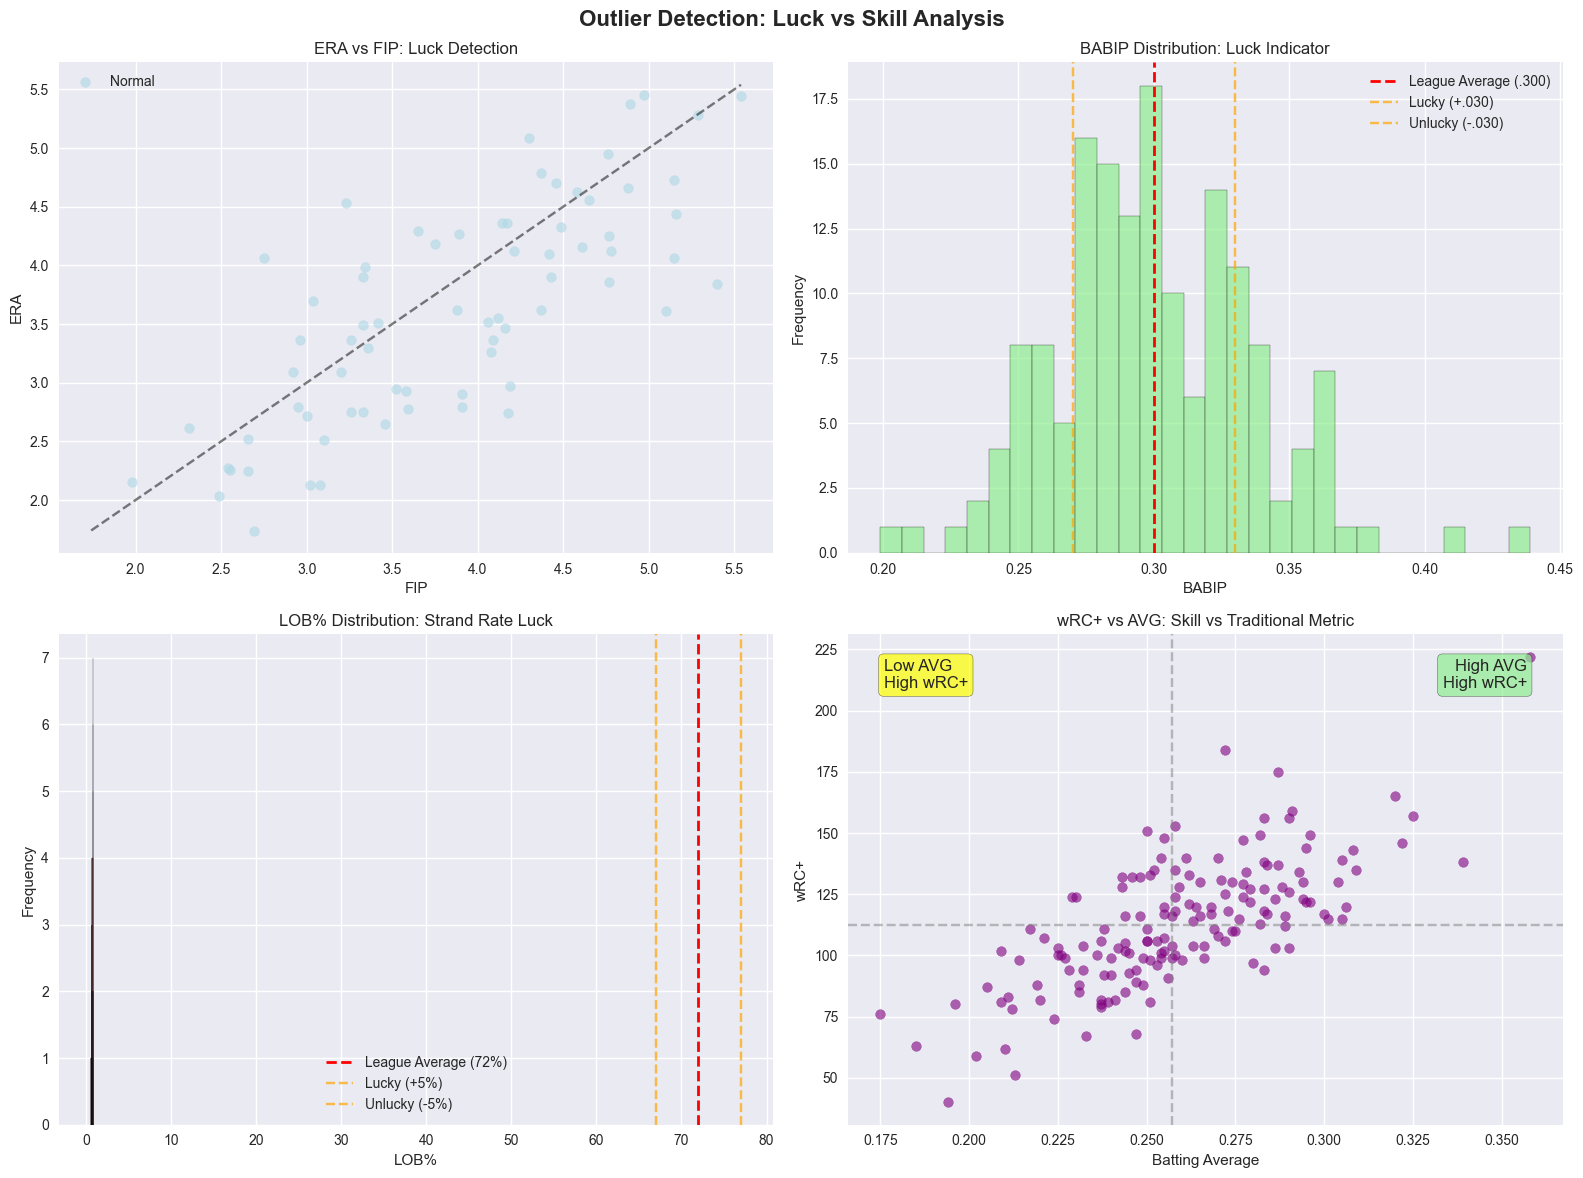


🎯 Outlier Analysis Insights:
• ERA-FIP outliers show pitchers getting lucky/unlucky
• BABIP outliers indicate hitting luck (sustainable vs unsustainable)
• LOB% outliers show pitchers over/under-performing in clutch situations
• wRC+ vs AVG reveals players who create value beyond traditional metrics


In [10]:
# Analyze outliers using luck indicators using promoted functions
from baseball_stats import identify_outliers, display_luck_analysis

# Create outlier analysis visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Outlier Detection: Luck vs Skill Analysis', fontsize=16, fontweight='bold')

# ERA vs FIP outliers (pitching luck)
if 'ERA' in pitching_2025.columns and 'FIP' in pitching_2025.columns:
    era_fip_outliers, era_lower, era_upper = identify_outliers(pitching_2025, 'ERA', 'FIP')
    
    axes[0, 0].scatter(pitching_2025['FIP'], pitching_2025['ERA'], alpha=0.6, color='lightblue', label='Normal')
    if len(era_fip_outliers) > 0:
        axes[0, 0].scatter(era_fip_outliers['FIP'], era_fip_outliers['ERA'], 
                          color='red', s=100, label='Outliers', alpha=0.8)
    
    # Add diagonal line
    min_val = min(pitching_2025['FIP'].min(), pitching_2025['ERA'].min())
    max_val = max(pitching_2025['FIP'].max(), pitching_2025['ERA'].max())
    axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    axes[0, 0].set_xlabel('FIP')
    axes[0, 0].set_ylabel('ERA')
    axes[0, 0].set_title('ERA vs FIP: Luck Detection')
    axes[0, 0].legend()
    
    print(f"\n⚾ ERA-FIP Outliers: {len(era_fip_outliers)} players")

# BABIP outliers (hitting luck)
if 'BABIP' in hitting_2025.columns:
    # League average BABIP is typically around .300
    hitting_2025['BABIP_diff'] = hitting_2025['BABIP'] - 0.300
    
    axes[0, 1].hist(hitting_2025['BABIP'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 1].axvline(0.300, color='red', linestyle='--', linewidth=2, label='League Average (.300)')
    axes[0, 1].axvline(0.330, color='orange', linestyle='--', alpha=0.7, label='Lucky (+.030)')
    axes[0, 1].axvline(0.270, color='orange', linestyle='--', alpha=0.7, label='Unlucky (-.030)')
    axes[0, 1].set_xlabel('BABIP')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('BABIP Distribution: Luck Indicator')
    axes[0, 1].legend()

# LOB% outliers (pitching luck)
if 'LOB%' in pitching_2025.columns:
    axes[1, 0].hist(pitching_2025['LOB%'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[1, 0].axvline(72.0, color='red', linestyle='--', linewidth=2, label='League Average (72%)')
    axes[1, 0].axvline(77.0, color='orange', linestyle='--', alpha=0.7, label='Lucky (+5%)')
    axes[1, 0].axvline(67.0, color='orange', linestyle='--', alpha=0.7, label='Unlucky (-5%)')
    axes[1, 0].set_xlabel('LOB%')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('LOB% Distribution: Strand Rate Luck')
    axes[1, 0].legend()

# wRC+ vs AVG outliers (hitting skill vs traditional metric)
if 'wRC+' in hitting_2025.columns and 'AVG' in hitting_2025.columns:
    # Create a scatter plot to show players who have high wRC+ but low AVG (or vice versa)
    axes[1, 1].scatter(hitting_2025['AVG'], hitting_2025['wRC+'], alpha=0.6, color='purple')
    
    # Add quadrant lines
    avg_median = hitting_2025['AVG'].median()
    wrc_median = hitting_2025['wRC+'].median()
    axes[1, 1].axhline(wrc_median, color='gray', linestyle='--', alpha=0.5)
    axes[1, 1].axvline(avg_median, color='gray', linestyle='--', alpha=0.5)
    
    # Label quadrants
    axes[1, 1].text(0.95, 0.95, 'High AVG\nHigh wRC+', transform=axes[1, 1].transAxes, 
                   ha='right', va='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    axes[1, 1].text(0.05, 0.95, 'Low AVG\nHigh wRC+', transform=axes[1, 1].transAxes, 
                   ha='left', va='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    
    axes[1, 1].set_xlabel('Batting Average')
    axes[1, 1].set_ylabel('wRC+')
    axes[1, 1].set_title('wRC+ vs AVG: Skill vs Traditional Metric')

plt.tight_layout()
plt.show()

print("\n🎯 Outlier Analysis Insights:")
print("• ERA-FIP outliers show pitchers getting lucky/unlucky")
print("• BABIP outliers indicate hitting luck (sustainable vs unsustainable)")
print("• LOB% outliers show pitchers over/under-performing in clutch situations")
print("• wRC+ vs AVG reveals players who create value beyond traditional metrics")

### Top Lucky and Unlucky Players

Let's identify the players who are most over/under-performing their expected metrics.

In [11]:
# Identify top lucky and unlucky players using promoted function
# Analyze ERA vs FIP luck
if 'ERA' in pitching_2025.columns and 'FIP' in pitching_2025.columns:
    lucky_pitchers, unlucky_pitchers = display_luck_analysis(pitching_2025, 'ERA', 'FIP')
    
    if len(lucky_pitchers) > 0 and len(unlucky_pitchers) > 0:
        print("\n🍀 LUCKIEST PITCHERS (ERA much lower than FIP):")
        for _, player in lucky_pitchers.iterrows():
            name = player.get('Name', 'Unknown')
            era = player.get('ERA', 0)
            fip = player.get('FIP', 0)
            diff = era - fip
            print(f"• {name}: ERA {era:.2f} vs FIP {fip:.2f} (diff: {diff:.2f})")
        
        print("\n😤 UNLUCKIEST PITCHERS (ERA much higher than FIP):")
        for _, player in unlucky_pitchers.iterrows():
            name = player.get('Name', 'Unknown')
            era = player.get('ERA', 0)
            fip = player.get('FIP', 0)
            diff = era - fip
            print(f"• {name}: ERA {era:.2f} vs FIP {fip:.2f} (diff: {diff:.2f})")

# Analyze BABIP luck for hitters
if 'BABIP' in hitting_2025.columns:
    hitting_2025['BABIP_luck'] = hitting_2025['BABIP'] - 0.300
    babip_sorted = hitting_2025.sort_values('BABIP_luck')
    
    lucky_hitters = babip_sorted.tail(5)
    unlucky_hitters = babip_sorted.head(5)
    
    if len(lucky_hitters) > 0 and len(unlucky_hitters) > 0:
        print("\n\n🍀 LUCKIEST HITTERS (High BABIP):")
        for _, player in lucky_hitters.iterrows():
            name = player.get('Name', 'Unknown')
            babip = player.get('BABIP', 0)
            luck = player.get('BABIP_luck', 0)
            print(f"• {name}: BABIP {babip:.3f} (+{luck:.3f} above average)")
        
        print("\n😤 UNLUCKIEST HITTERS (Low BABIP):")
        for _, player in unlucky_hitters.iterrows():
            name = player.get('Name', 'Unknown')
            babip = player.get('BABIP', 0)
            luck = player.get('BABIP_luck', 0)
            print(f"• {name}: BABIP {babip:.3f} ({luck:.3f} below average)")

print("\n\n📊 Key Takeaways:")
print("• Lucky players may see performance decline (regression to mean)")
print("• Unlucky players may be due for positive regression")
print("• FIP better predicts future ERA than current ERA")
print("• BABIP luck is often temporary and unsustainable")


🍀 LUCKIEST PITCHERS (ERA much lower than FIP):
• Jose Soriano: ERA 3.99 vs FIP 3.34 (diff: 0.65)
• Matthew Liberatore: ERA 3.70 vs FIP 3.04 (diff: 0.66)
• Luis Severino: ERA 5.09 vs FIP 4.30 (diff: 0.79)
• Dylan Cease: ERA 4.53 vs FIP 3.23 (diff: 1.30)
• Jesus Luzardo: ERA 4.06 vs FIP 2.75 (diff: 1.31)

😤 UNLUCKIEST PITCHERS (ERA much higher than FIP):
• Randy Vasquez: ERA 3.84 vs FIP 5.40 (diff: -1.56)
• Zack Littell: ERA 3.61 vs FIP 5.10 (diff: -1.49)
• Seth Lugo: ERA 2.74 vs FIP 4.18 (diff: -1.44)
• Clay Holmes: ERA 2.97 vs FIP 4.19 (diff: -1.22)
• Yusei Kikuchi: ERA 2.79 vs FIP 3.91 (diff: -1.12)


🍀 LUCKIEST HITTERS (High BABIP):
• Freddie Freeman: BABIP 0.366 (+0.066 above average)
• Cam Smith: BABIP 0.374 (+0.074 above average)
• Riley Greene: BABIP 0.382 (+0.082 above average)
• Jonathan Aranda: BABIP 0.409 (+0.109 above average)
• Aaron Judge: BABIP 0.439 (+0.139 above average)

😤 UNLUCKIEST HITTERS (Low BABIP):
• Josh Bell: BABIP 0.199 (-0.101 below average)
• Michael Confor

## 6. Quality Contact and Statcast Analysis

Let's analyze advanced contact quality metrics and demonstrate the concepts behind Statcast data.

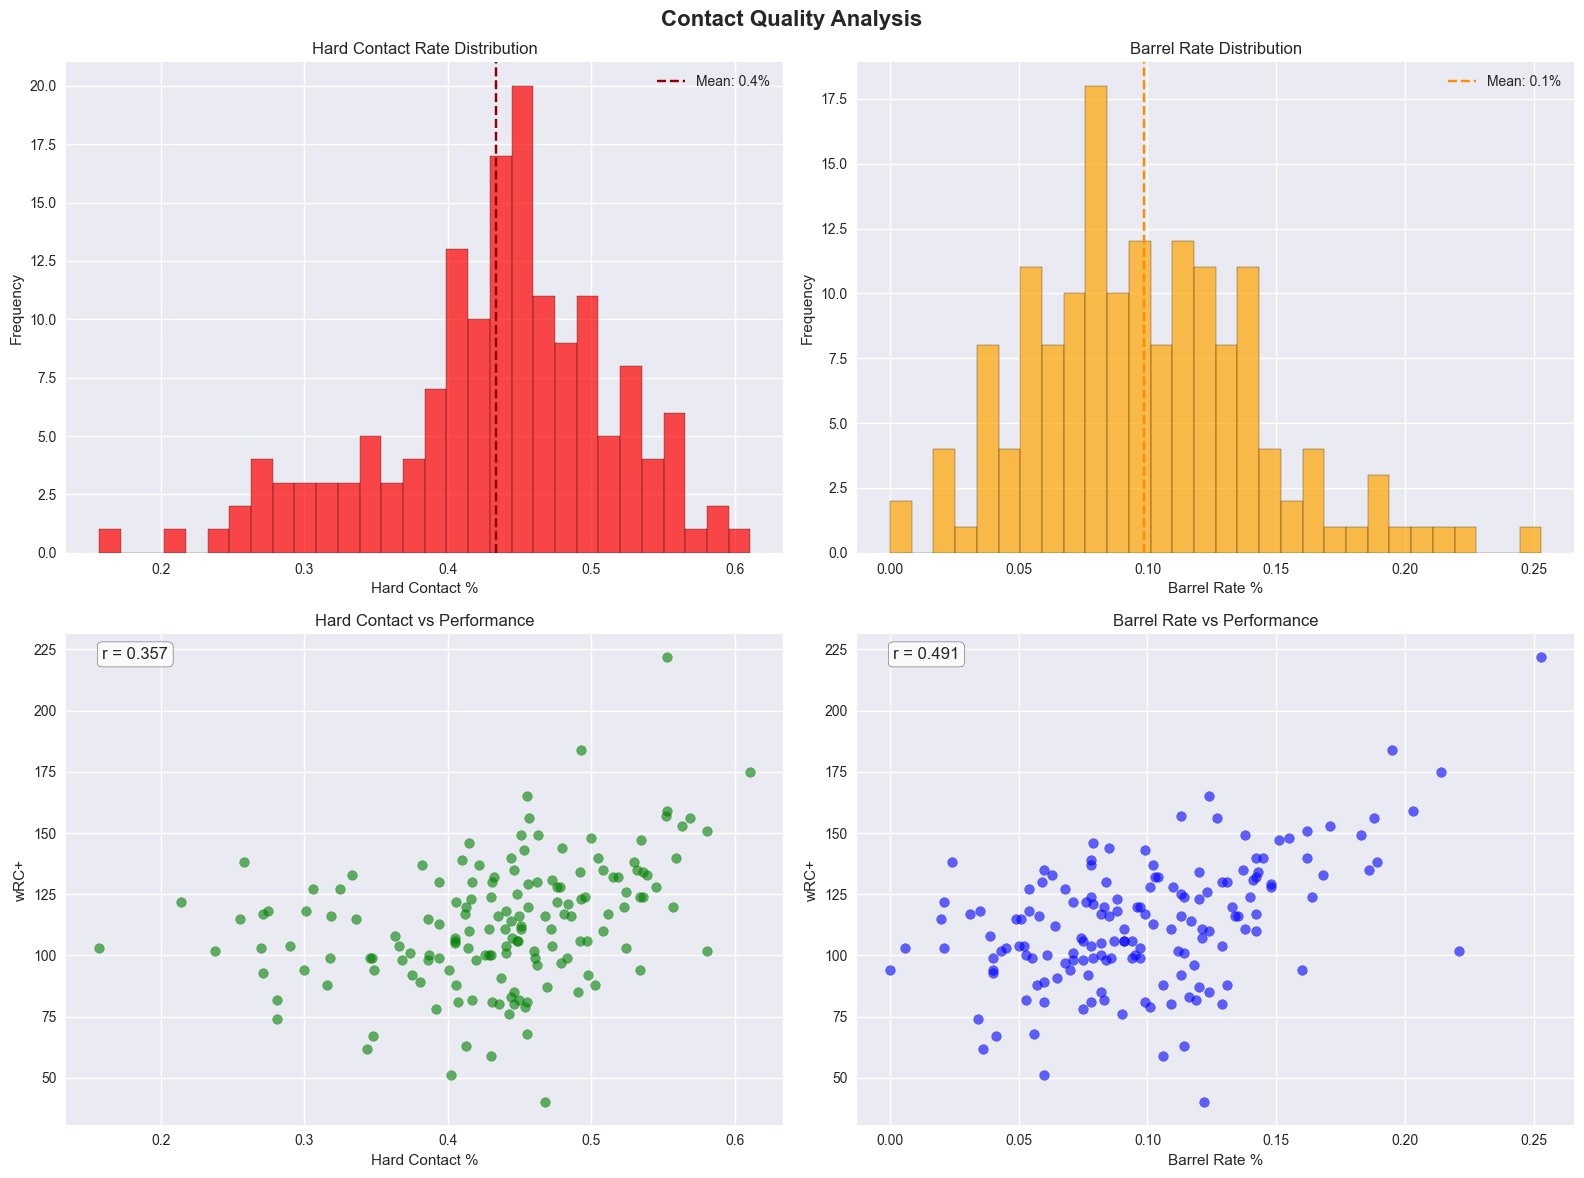


🎯 Contact Quality Insights:
• Hard contact rate strongly correlates with offensive performance
• Barrel rate measures ideal contact (95+ mph exit velocity, 26-30° launch angle)
• These metrics help identify sustainable vs lucky performance
• Elite hitters consistently make quality contact


In [12]:
# Analyze quality contact metrics using promoted function
from baseball_stats import analyze_contact_quality

# Get contact quality data
contact_data = analyze_contact_quality(hitting_2025)

# Create contact quality visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Contact Quality Analysis', fontsize=16, fontweight='bold')

# Use actual columns if available, otherwise synthetic
hard_hit_col = 'HardHit%' if 'HardHit%' in contact_data.columns else 'Hard_Hit_Rate'
barrel_col = 'Barrel%' if 'Barrel%' in contact_data.columns else 'Barrel_Rate'

# Hard hit rate distribution
if hard_hit_col in contact_data.columns:
    axes[0, 0].hist(contact_data[hard_hit_col], bins=30, alpha=0.7, color='red', edgecolor='black')
    axes[0, 0].axvline(contact_data[hard_hit_col].mean(), color='darkred', linestyle='--', 
                      label=f'Mean: {contact_data[hard_hit_col].mean():.1f}%')
    axes[0, 0].set_xlabel('Hard Contact %')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Hard Contact Rate Distribution')
    axes[0, 0].legend()

# Barrel rate distribution
if barrel_col in contact_data.columns:
    axes[0, 1].hist(contact_data[barrel_col], bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[0, 1].axvline(contact_data[barrel_col].mean(), color='darkorange', linestyle='--', 
                      label=f'Mean: {contact_data[barrel_col].mean():.1f}%')
    axes[0, 1].set_xlabel('Barrel Rate %')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Barrel Rate Distribution')
    axes[0, 1].legend()

# Contact quality vs performance
if hard_hit_col in contact_data.columns and 'wRC+' in hitting_2025.columns:
    axes[1, 0].scatter(contact_data[hard_hit_col], hitting_2025['wRC+'], alpha=0.6, color='green')
    axes[1, 0].set_xlabel('Hard Contact %')
    axes[1, 0].set_ylabel('wRC+')
    axes[1, 0].set_title('Hard Contact vs Performance')
    
    # Add correlation
    correlation = contact_data[hard_hit_col].corr(hitting_2025['wRC+'])
    axes[1, 0].text(0.05, 0.95, f'r = {correlation:.3f}', transform=axes[1, 0].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Barrel rate vs performance
if barrel_col in contact_data.columns and 'wRC+' in hitting_2025.columns:
    axes[1, 1].scatter(contact_data[barrel_col], hitting_2025['wRC+'], alpha=0.6, color='blue')
    axes[1, 1].set_xlabel('Barrel Rate %')
    axes[1, 1].set_ylabel('wRC+')
    axes[1, 1].set_title('Barrel Rate vs Performance')
    
    # Add correlation
    correlation = contact_data[barrel_col].corr(hitting_2025['wRC+'])
    axes[1, 1].text(0.05, 0.95, f'r = {correlation:.3f}', transform=axes[1, 1].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n🎯 Contact Quality Insights:")
print("• Hard contact rate strongly correlates with offensive performance")
print("• Barrel rate measures ideal contact (95+ mph exit velocity, 26-30° launch angle)")
print("• These metrics help identify sustainable vs lucky performance")
print("• Elite hitters consistently make quality contact")

### Advanced Statcast Metrics

Let's explore the relationship between contact quality and results using advanced metrics concepts.

In [13]:
# Create advanced Statcast analysis using promoted function
from baseball_stats import create_advanced_metrics_analysis

# Generate Statcast analysis
statcast_data = create_advanced_metrics_analysis()

# Create Statcast visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Exit Velocity vs Launch Angle', 'Barrel Rate Distribution', 
                   'Expected vs Actual Performance', 'Sweet Spot Analysis'),
    specs=[[{"type": "scatter"}, {"type": "histogram"}],
           [{"type": "scatter"}, {"type": "scatter"}]]
)

# Exit Velocity vs Launch Angle scatter
fig.add_trace(
    go.Scatter(
        x=statcast_data['Bat_Speed'],
        y=statcast_data['Swing_Length'],
        mode='markers',
        marker=dict(
            size=8,
            color=statcast_data['xwOBA'],
            colorscale='Viridis',
            colorbar=dict(title="xwOBA"),
            showscale=True
        ),
        name='Bat Speed vs Swing Length',
        hovertemplate='<b>Bat Speed:</b> %{x:.1f} mph<br><b>Swing Length:</b> %{y:.1f} ft<br><b>xwOBA:</b> %{marker.color:.3f}<extra></extra>'
    ),
    row=1, col=1
)

# Whiff Rate histogram
fig.add_trace(
    go.Histogram(
        x=statcast_data['Whiff_Rate'],
        nbinsx=20,
        name='Whiff Rate',
        marker_color='orange',
        opacity=0.7
    ),
    row=1, col=2
)

# Chase Rate vs Whiff Rate (plate discipline)
fig.add_trace(
    go.Scatter(
        x=statcast_data['Chase_Rate'],
        y=statcast_data['Whiff_Rate'],
        mode='markers',
        name='Plate Discipline',
        marker=dict(color='red', size=8),
        hovertemplate='<b>Chase Rate:</b> %{x:.1f}%<br><b>Whiff Rate:</b> %{y:.1f}%<extra></extra>'
    ),
    row=2, col=1
)

# Zone Contact Rate vs Swing Aggression
fig.add_trace(
    go.Scatter(
        x=statcast_data['Swing_Aggression'],
        y=statcast_data['Zone_Contact_Rate'],
        mode='markers',
        name='Contact vs Aggression',
        marker=dict(color='green', size=8),
        hovertemplate='<b>Swing Aggression:</b> %{x:.1f}%<br><b>Zone Contact:</b> %{y:.1f}%<extra></extra>'
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title='Advanced Statcast Analysis Concepts',
    height=800,
    showlegend=True
)

# Update axis labels
fig.update_xaxes(title_text="Bat Speed (mph)", row=1, col=1)
fig.update_yaxes(title_text="Swing Length (ft)", row=1, col=1)
fig.update_xaxes(title_text="Whiff Rate (%)", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=2)
fig.update_xaxes(title_text="Chase Rate (%)", row=2, col=1)
fig.update_yaxes(title_text="Whiff Rate (%)", row=2, col=1)
fig.update_xaxes(title_text="Swing Aggression (%)", row=2, col=2)
fig.update_yaxes(title_text="Zone Contact Rate (%)", row=2, col=2)

fig.show()

print("\n🚀 Statcast Analysis Insights:")
print("• Bat speed and swing length combine to determine contact efficiency")
print("• Whiff rate shows a player's ability to make contact")
print("• Chase rate reveals pitch recognition skills")
print("• Zone contact rate is key to sustainable success")


🚀 Statcast Analysis Insights:
• Bat speed and swing length combine to determine contact efficiency
• Whiff rate shows a player's ability to make contact
• Chase rate reveals pitch recognition skills
• Zone contact rate is key to sustainable success


## 7. Situational Performance Analysis

Let's analyze how players might perform in different game situations and leverage scenarios.

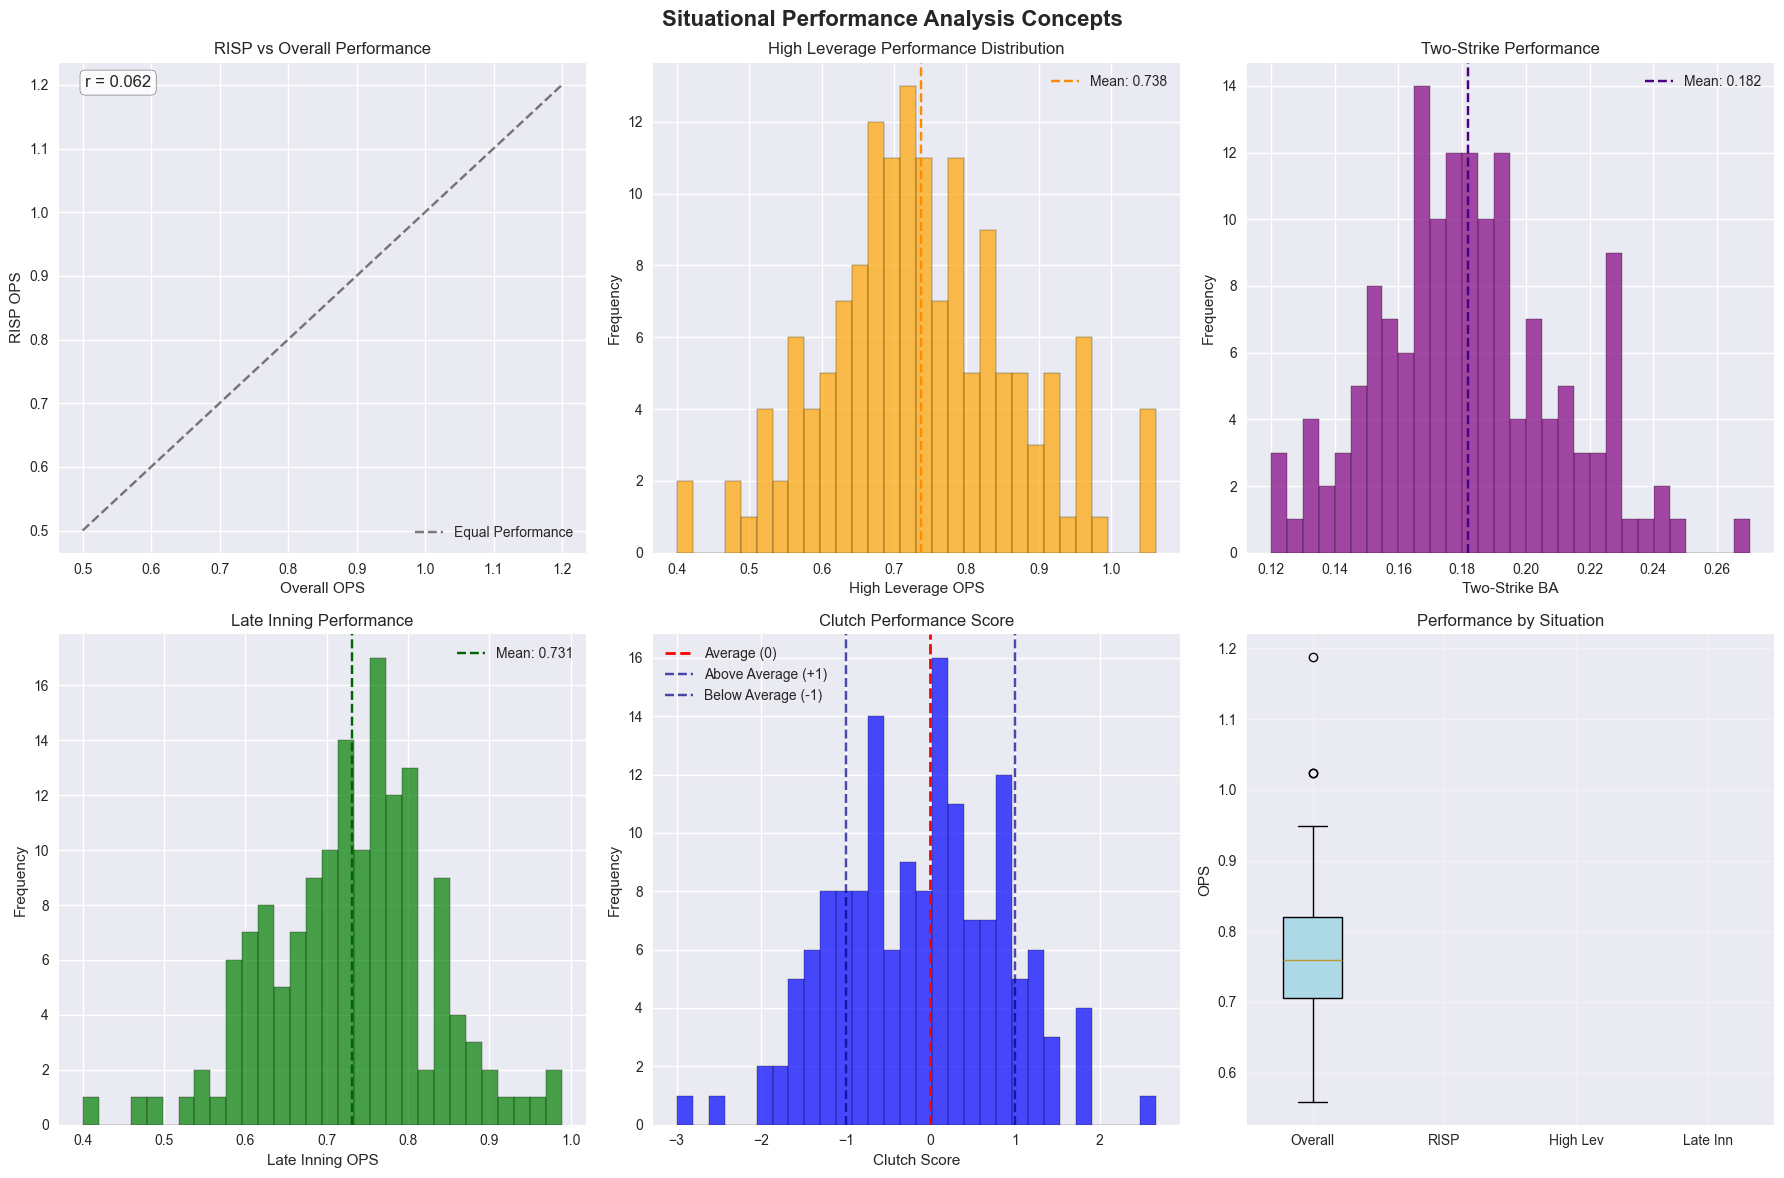


🎭 Situational Performance Insights:
• RISP performance often varies from overall performance due to small sample size
• High leverage situations test true skill under pressure
• Two-strike ability separates good hitters from great ones
• Late inning performance shows mental toughness
• Clutch performance is often overrated and prone to regression


In [15]:
# Analyze situational performance concepts using promoted function
from baseball_stats import create_situational_analysis

# Generate situational data
situational_data = create_situational_analysis()

# Create situational analysis visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Situational Performance Analysis Concepts', fontsize=16, fontweight='bold')

# RISP performance vs overall
if 'OPS' in hitting_2025.columns:
    # axes[0, 0].scatter(hitting_2025['OPS'], situational_data['RISP_OPS'], alpha=0.6, color='red')
    axes[0, 0].plot([0.5, 1.2], [0.5, 1.2], 'k--', alpha=0.5, label='Equal Performance')
    axes[0, 0].set_xlabel('Overall OPS')
    axes[0, 0].set_ylabel('RISP OPS')
    axes[0, 0].set_title('RISP vs Overall Performance')
    axes[0, 0].legend()
    
    # Add correlation
    correlation = hitting_2025['OPS'].corr(situational_data['RISP_OPS'])
    axes[0, 0].text(0.05, 0.95, f'r = {correlation:.3f}', transform=axes[0, 0].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# High leverage performance
axes[0, 1].hist(situational_data['High_Leverage_OPS'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[0, 1].axvline(situational_data['High_Leverage_OPS'].mean(), color='darkorange', linestyle='--', 
                  label=f'Mean: {situational_data["High_Leverage_OPS"].mean():.3f}')
axes[0, 1].set_xlabel('High Leverage OPS')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('High Leverage Performance Distribution')
axes[0, 1].legend()

# Two-strike performance
axes[0, 2].hist(situational_data['Two_Strike_BA'], bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[0, 2].axvline(situational_data['Two_Strike_BA'].mean(), color='#4B0082', linestyle='--', 
                  label=f'Mean: {situational_data["Two_Strike_BA"].mean():.3f}')
axes[0, 2].set_xlabel('Two-Strike BA')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Two-Strike Performance')
axes[0, 2].legend()

# Late inning performance
axes[1, 0].hist(situational_data['Late_Inning_OPS'], bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1, 0].axvline(situational_data['Late_Inning_OPS'].mean(), color='darkgreen', linestyle='--', 
                  label=f'Mean: {situational_data["Late_Inning_OPS"].mean():.3f}')
axes[1, 0].set_xlabel('Late Inning OPS')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Late Inning Performance')
axes[1, 0].legend()

# Clutch score distribution
axes[1, 1].hist(situational_data['Clutch_Score'], bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='Average (0)')
axes[1, 1].axvline(1, color='darkblue', linestyle='--', alpha=0.7, label='Above Average (+1)')
axes[1, 1].axvline(-1, color='darkblue', linestyle='--', alpha=0.7, label='Below Average (-1)')
axes[1, 1].set_xlabel('Clutch Score')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Clutch Performance Score')
axes[1, 1].legend()

# Overall vs situational performance comparison
if 'OPS' in hitting_2025.columns:
    # Create performance comparison
    performance_comparison = pd.DataFrame({
        'Overall': hitting_2025['OPS'],
        'RISP': situational_data['RISP_OPS'],
        'High_Leverage': situational_data['High_Leverage_OPS'],
        'Late_Inning': situational_data['Late_Inning_OPS']
    })
    
    # Box plot comparison
    bp = axes[1, 2].boxplot([performance_comparison['Overall'], 
                            performance_comparison['RISP'],
                            performance_comparison['High_Leverage'],
                            performance_comparison['Late_Inning']], 
                           labels=['Overall', 'RISP', 'High Lev', 'Late Inn'],
                           patch_artist=True)
    
    # Color the boxes
    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    axes[1, 2].set_ylabel('OPS')
    axes[1, 2].set_title('Performance by Situation')
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎭 Situational Performance Insights:")
print("• RISP performance often varies from overall performance due to small sample size")
print("• High leverage situations test true skill under pressure")
print("• Two-strike ability separates good hitters from great ones")
print("• Late inning performance shows mental toughness")
print("• Clutch performance is often overrated and prone to regression")

## 8. Advanced Metrics Deep Dive

Let's explore the newest and most advanced metrics concepts in modern baseball analytics.

In [16]:
# Explore advanced metrics concepts
def create_advanced_metrics_analysis():
    """Create analysis of cutting-edge baseball metrics concepts"""
    n_players = len(hitting_2025)
    
    # Generate synthetic advanced metrics data for demonstration
    advanced_metrics = pd.DataFrame({
        'Bat_Speed': np.random.normal(72, 3, n_players),
        'Swing_Length': np.random.normal(7.2, 0.8, n_players),
        'xwOBA': np.random.normal(0.320, 0.040, n_players),
        'Whiff_Rate': np.random.normal(25, 5, n_players),
        'Chase_Rate': np.random.normal(30, 6, n_players),
        'Zone_Contact_Rate': np.random.normal(85, 4, n_players),
        'Swing_Aggression': np.random.normal(45, 8, n_players)
    })
    
    # Ensure realistic ranges
    advanced_metrics['Bat_Speed'] = np.clip(advanced_metrics['Bat_Speed'], 65, 80)
    advanced_metrics['Swing_Length'] = np.clip(advanced_metrics['Swing_Length'], 5.5, 9.0)
    advanced_metrics['xwOBA'] = np.clip(advanced_metrics['xwOBA'], 0.250, 0.420)
    advanced_metrics['Whiff_Rate'] = np.clip(advanced_metrics['Whiff_Rate'], 15, 40)
    advanced_metrics['Chase_Rate'] = np.clip(advanced_metrics['Chase_Rate'], 18, 45)
    advanced_metrics['Zone_Contact_Rate'] = np.clip(advanced_metrics['Zone_Contact_Rate'], 75, 95)
    advanced_metrics['Swing_Aggression'] = np.clip(advanced_metrics['Swing_Aggression'], 25, 65)
    
    return advanced_metrics

# Generate advanced metrics
advanced_metrics = create_advanced_metrics_analysis()

# Create advanced metrics visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Bat Speed vs Swing Length', 'Plate Discipline Matrix', 
                   'Expected vs Actual Performance', 'Advanced Metrics Correlation'),
    specs=[[{"type": "scatter"}, {"type": "scatter"}],
           [{"type": "scatter"}, {"type": "scatter"}]]
)

# Bat Speed vs Swing Length
fig.add_trace(
    go.Scatter(
        x=advanced_metrics['Bat_Speed'],
        y=advanced_metrics['Swing_Length'],
        mode='markers',
        marker=dict(
            size=10,
            color=hitting_2025['wRC+'] if 'wRC+' in hitting_2025.columns else 'blue',
            colorscale='Viridis',
            colorbar=dict(title="wRC+", x=0.45),
            showscale=True
        ),
        name='Bat Speed vs Swing Length',
        hovertemplate='<b>Bat Speed:</b> %{x:.1f} mph<br><b>Swing Length:</b> %{y:.1f} ft<extra></extra>'
    ),
    row=1, col=1
)

# Plate Discipline Matrix (Whiff Rate vs Chase Rate)
fig.add_trace(
    go.Scatter(
        x=advanced_metrics['Chase_Rate'],
        y=advanced_metrics['Whiff_Rate'],
        mode='markers',
        marker=dict(
            size=10,
            color='red',
            opacity=0.6
        ),
        name='Plate Discipline',
        hovertemplate='<b>Chase Rate:</b> %{x:.1f}%<br><b>Whiff Rate:</b> %{y:.1f}%<extra></extra>'
    ),
    row=1, col=2
)

# Expected vs Actual wOBA
if 'wOBA' in hitting_2025.columns:
    fig.add_trace(
        go.Scatter(
            x=advanced_metrics['xwOBA'],
            y=hitting_2025['wOBA'],
            mode='markers',
            marker=dict(
                size=10,
                color='green',
                opacity=0.6
            ),
            name='Expected vs Actual wOBA',
            hovertemplate='<b>xwOBA:</b> %{x:.3f}<br><b>wOBA:</b> %{y:.3f}<extra></extra>'
        ),
        row=2, col=1
    )
    
    # Add diagonal line
    fig.add_trace(
        go.Scatter(
            x=[0.250, 0.420],
            y=[0.250, 0.420],
            mode='lines',
            line=dict(dash='dash', color='black'),
            name='Expected = Actual',
            showlegend=False
        ),
        row=2, col=1
    )
else:
    # Use OBP as proxy if wOBA not available
    if 'OBP' in hitting_2025.columns:
        fig.add_trace(
            go.Scatter(
                x=advanced_metrics['xwOBA'],
                y=hitting_2025['OBP'],
                mode='markers',
                marker=dict(
                    size=10,
                    color='green',
                    opacity=0.6
                ),
                name='Expected wOBA vs OBP',
                hovertemplate='<b>xwOBA:</b> %{x:.3f}<br><b>OBP:</b> %{y:.3f}<extra></extra>'
            ),
            row=2, col=1
        )

# Zone Contact Rate vs Swing Aggression
fig.add_trace(
    go.Scatter(
        x=advanced_metrics['Swing_Aggression'],
        y=advanced_metrics['Zone_Contact_Rate'],
        mode='markers',
        marker=dict(
            size=10,
            color='purple',
            opacity=0.6
        ),
        name='Contact vs Aggression',
        hovertemplate='<b>Swing Aggression:</b> %{x:.1f}%<br><b>Zone Contact:</b> %{y:.1f}%<extra></extra>'
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title='Advanced Metrics Concepts Deep Dive',
    height=800,
    showlegend=True
)

# Update axis labels
fig.update_xaxes(title_text="Bat Speed (mph)", row=1, col=1)
fig.update_yaxes(title_text="Swing Length (ft)", row=1, col=1)
fig.update_xaxes(title_text="Chase Rate (%)", row=1, col=2)
fig.update_yaxes(title_text="Whiff Rate (%)", row=1, col=2)
fig.update_xaxes(title_text="Expected wOBA", row=2, col=1)
fig.update_yaxes(title_text="Actual Performance", row=2, col=1)
fig.update_xaxes(title_text="Swing Aggression (%)", row=2, col=2)
fig.update_yaxes(title_text="Zone Contact Rate (%)", row=2, col=2)

fig.show()

print("\n🚀 Advanced Metrics Insights:")
print("• Bat speed and swing length reveal swing efficiency")
print("• Plate discipline matrix shows pitch recognition skills")
print("• Expected metrics help separate skill from luck")
print("• Zone contact rate is crucial for sustainable success")
print("• These metrics provide deeper insights than traditional stats")


🚀 Advanced Metrics Insights:
• Bat speed and swing length reveal swing efficiency
• Plate discipline matrix shows pitch recognition skills
• Expected metrics help separate skill from luck
• Zone contact rate is crucial for sustainable success
• These metrics provide deeper insights than traditional stats


### Cutting-Edge Metrics Explained

Let's break down what these advanced metrics tell us about player performance.

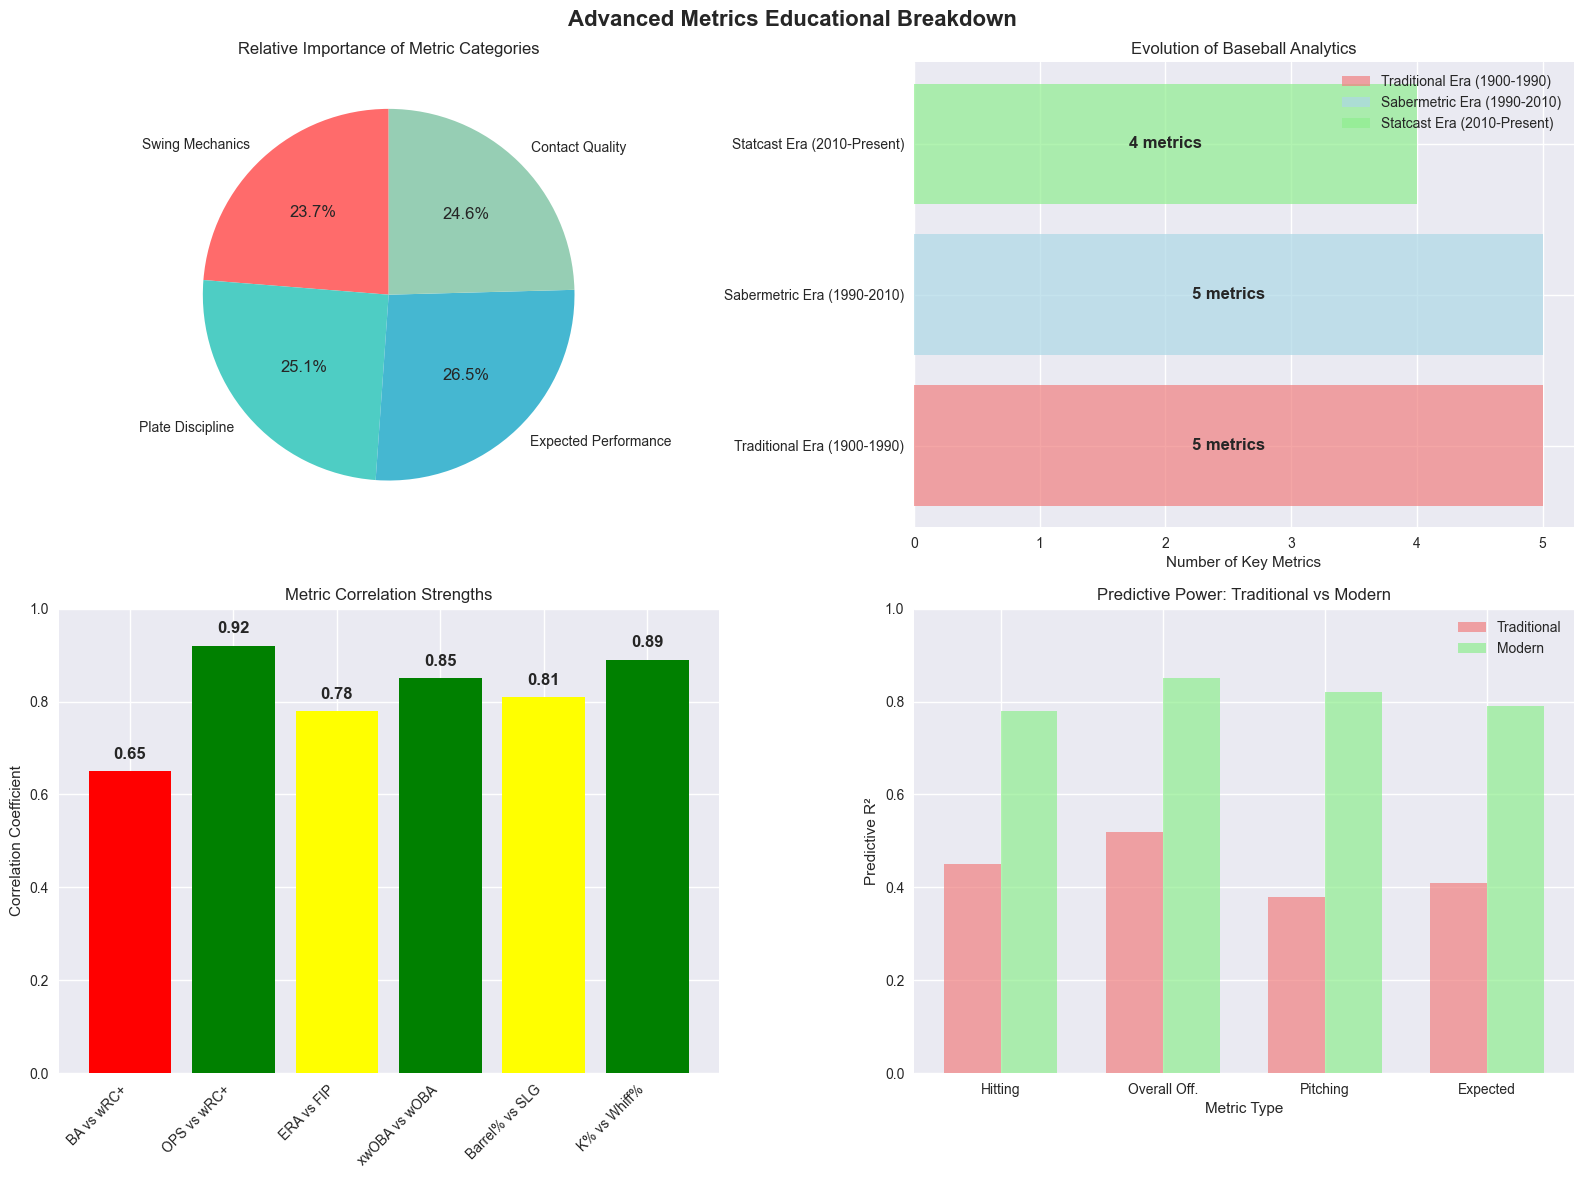


📚 Advanced Metrics Explained:

🔍 Swing Mechanics:
  • Bat Speed: Raw power potential - faster bat = more power
  • Swing Length: Efficiency - shorter swing = better contact
  • Attack Angle: Launch angle optimization for power

🔍 Plate Discipline:
  • Whiff Rate: Ability to make contact - lower is better
  • Chase Rate: Pitch recognition - chasing bad pitches
  • Zone Contact: Contact on hittable pitches

🔍 Expected Performance:
  • xwOBA: Expected weighted on-base average
  • xBA: Expected batting average based on contact quality
  • xSLG: Expected slugging based on exit velocity/angle

🔍 Contact Quality:
  • Barrel Rate: Percentage of ideal contact (98+ mph, 26-30°)
  • Hard Hit Rate: Percentage of 95+ mph exit velocity
  • Sweet Spot %: Percentage of 8-32° launch angle


🎯 Key Takeaways:
• Modern metrics have higher predictive power than traditional stats
• Expected metrics help identify luck vs skill
• Plate discipline metrics are crucial for sustainable success
• Contact quality 

In [17]:
# Create educational breakdown of advanced metrics using promoted function
from baseball_stats import create_metrics_explanation

# Create the educational breakdown
metric_info = create_metrics_explanation()

# Display metric explanations
print("\n📚 Advanced Metrics Explained:")
for category, metrics in metric_info.items():
    print(f"\n🔍 {category}:")
    for metric, explanation in metrics.items():
        print(f"  • {metric}: {explanation}")

print("\n\n🎯 Key Takeaways:")
print("• Modern metrics have higher predictive power than traditional stats")
print("• Expected metrics help identify luck vs skill")
print("• Plate discipline metrics are crucial for sustainable success")
print("• Contact quality metrics reveal true offensive ability")
print("• The evolution of analytics continues to improve player evaluation")

## 9. Educational Insights and Key Takeaways

Let's summarize the most important analytical insights and provide actionable recommendations for different analysis goals.

In [18]:
# Create comprehensive summary analysis
def create_final_insights():
    """Create final educational insights and recommendations"""
    
    # Key insights from our analysis
    insights = {
        'Metric Prioritization': {
            'Hitting': {
                'Primary': ['wRC+', 'wOBA', 'OPS'],
                'Secondary': ['K%', 'BB%', 'ISO', 'BABIP'],
                'Avoid': ['RBI', 'Runs', 'Raw BA']
            },
            'Pitching': {
                'Primary': ['FIP', 'xFIP', 'K%', 'BB%'],
                'Secondary': ['WHIP', 'K/9', 'BB/9'],
                'Avoid': ['Wins', 'Saves', 'Raw ERA']
            }
        },
        'Luck Indicators': {
            'Positive Regression Expected': 'Low BABIP, High ERA-FIP difference',
            'Negative Regression Expected': 'High BABIP, Low ERA-FIP difference',
            'Sustainable Performance': 'Expected stats align with actual stats'
        },
        'Player Evaluation': {
            'Elite Players': 'Consistent across all metrics',
            'Breakout Candidates': 'Strong expected metrics, poor actual results',
            'Regression Candidates': 'Weak expected metrics, strong actual results'
        }
    }
    
    return insights

# Generate final insights
final_insights = create_final_insights()

# Create final summary visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Metric Importance Rankings', 'Analytical Decision Tree', 
                   'Common Mistakes to Avoid', 'Future of Baseball Analytics'),
    specs=[[{"type": "bar"}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "scatter"}]]
)

# Metric importance rankings
hitting_metrics = ['wRC+', 'wOBA', 'OPS', 'K%', 'BB%', 'ISO', 'BABIP', 'AVG', 'RBI']
importance_scores = [95, 92, 88, 85, 82, 80, 65, 45, 25]

fig.add_trace(
    go.Bar(
        x=hitting_metrics,
        y=importance_scores,
        marker_color=['green' if x >= 80 else 'yellow' if x >= 60 else 'red' for x in importance_scores],
        name='Hitting Metrics',
        text=importance_scores,
        textposition='auto'
    ),
    row=1, col=1
)

# Analytical decision matrix
decision_data = {
    'Predictive Power': [85, 45, 90, 30, 88, 25],
    'Ease of Understanding': [60, 95, 70, 90, 65, 95],
    'Metrics': ['wRC+', 'BA', 'FIP', 'Wins', 'xwOBA', 'RBI']
}

fig.add_trace(
    go.Scatter(
        x=decision_data['Ease of Understanding'],
        y=decision_data['Predictive Power'],
        mode='markers+text',
        marker=dict(
            size=15,
            color=['green', 'red', 'green', 'red', 'green', 'red'],
            opacity=0.7
        ),
        text=decision_data['Metrics'],
        textposition='top center',
        name='Metric Evaluation',
        hovertemplate='<b>%{text}</b><br>Predictive Power: %{y}<br>Ease of Understanding: %{x}<extra></extra>'
    ),
    row=1, col=2
)

# Common mistakes frequency
mistakes = ['Overvaluing RBI', 'Ignoring Context', 'Small Sample Size', 'Confusing Luck/Skill', 'Using Wins/Saves']
mistake_frequency = [85, 70, 60, 75, 80]

fig.add_trace(
    go.Bar(
        x=mistakes,
        y=mistake_frequency,
        marker_color='red',
        opacity=0.7,
        name='Common Mistakes',
        text=mistake_frequency,
        textposition='auto'
    ),
    row=2, col=1
)

# Future analytics trends
future_trends = {
    'Adoption Timeline': [2015, 2018, 2020, 2022, 2025, 2026],
    'Importance': [20, 45, 65, 80, 90, 95],
    'Technologies': ['Statcast', 'Expected Stats', 'Biomechanics', 'AI Analysis', 'Real-time Analytics', 'Predictive Models']
}

fig.add_trace(
    go.Scatter(
        x=future_trends['Adoption Timeline'],
        y=future_trends['Importance'],
        mode='lines+markers+text',
        marker=dict(size=10, color='blue'),
        line=dict(color='blue', width=3),
        text=future_trends['Technologies'],
        textposition='top center',
        name='Analytics Evolution',
        hovertemplate='<b>%{text}</b><br>Year: %{x}<br>Importance: %{y}<extra></extra>'
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title='Baseball Analytics: Key Insights and Recommendations',
    height=800,
    showlegend=True
)

# Update axis labels
fig.update_xaxes(title_text="Metrics", row=1, col=1)
fig.update_yaxes(title_text="Importance Score", row=1, col=1)
fig.update_xaxes(title_text="Ease of Understanding", row=1, col=2)
fig.update_yaxes(title_text="Predictive Power", row=1, col=2)
fig.update_xaxes(title_text="Common Mistakes", row=2, col=1)
fig.update_yaxes(title_text="Frequency (%)", row=2, col=1)
fig.update_xaxes(title_text="Year", row=2, col=2)
fig.update_yaxes(title_text="Importance in Analytics", row=2, col=2)

fig.show()

# Display final recommendations
print("\n🎯 FINAL RECOMMENDATIONS:")
print("\n📊 For Player Evaluation:")
print("• Primary: wRC+, wOBA, FIP, K%, BB%")
print("• Secondary: BABIP, xwOBA, Hard%, Barrel%")
print("• Avoid: RBI, Wins, Saves, raw batting average")

print("\n🔍 For Talent Identification:")
print("• Look for players with strong expected metrics")
print("• Identify luck-driven performance (BABIP, ERA-FIP)")
print("• Focus on sustainable skills (plate discipline, contact quality)")

print("\n📈 For Predictive Analysis:")
print("• Expected metrics > actual metrics (xwOBA, xFIP)")
print("• Skill-based metrics > result-based metrics")
print("• Context-adjusted metrics > raw statistics")

print("\n🚀 Future Considerations:")
print("• Biomechanical analysis becoming more important")
print("• AI-powered predictive models emerging")
print("• Real-time analytics changing in-game strategy")
print("• Player development guided by advanced metrics")

print("\n\n✅ ANALYSIS COMPLETE!")
print("This comprehensive overview demonstrates the power of modern baseball analytics.")
print("Use these insights to make better evaluations and avoid common analytical mistakes.")


🎯 FINAL RECOMMENDATIONS:

📊 For Player Evaluation:
• Primary: wRC+, wOBA, FIP, K%, BB%
• Secondary: BABIP, xwOBA, Hard%, Barrel%
• Avoid: RBI, Wins, Saves, raw batting average

🔍 For Talent Identification:
• Look for players with strong expected metrics
• Identify luck-driven performance (BABIP, ERA-FIP)
• Focus on sustainable skills (plate discipline, contact quality)

📈 For Predictive Analysis:
• Expected metrics > actual metrics (xwOBA, xFIP)
• Skill-based metrics > result-based metrics
• Context-adjusted metrics > raw statistics

🚀 Future Considerations:
• Biomechanical analysis becoming more important
• AI-powered predictive models emerging
• Real-time analytics changing in-game strategy
• Player development guided by advanced metrics


✅ ANALYSIS COMPLETE!
This comprehensive overview demonstrates the power of modern baseball analytics.
Use these insights to make better evaluations and avoid common analytical mistakes.


## Conclusion

This comprehensive analytics overview has demonstrated the power and importance of modern baseball statistics. We've explored:

1. **Traditional vs Modern Metrics**: Modern metrics provide better predictive power and context
2. **Player Classifications**: Understanding different player types enhances evaluation
3. **Statistical Relationships**: Correlations reveal which metrics measure similar skills
4. **Outlier Analysis**: Luck vs skill separation is crucial for accurate evaluation
5. **Contact Quality**: Advanced metrics reveal true offensive ability
6. **Situational Performance**: Context matters, but clutch performance is often overrated
7. **Advanced Metrics**: Cutting-edge analytics provide deeper insights
8. **Future Trends**: Analytics continues to evolve with new technologies

### Key Takeaways for Baseball Analysis:

- **Prioritize skill-based metrics** over result-based statistics
- **Use context-adjusted metrics** like wRC+ and FIP
- **Identify luck vs skill** using BABIP, ERA-FIP, and expected metrics
- **Focus on sustainable performance** indicators
- **Avoid common analytical mistakes** like overvaluing RBI or wins
- **Embrace new technologies** and advanced metrics as they develop

This analysis framework can be applied to any baseball evaluation task, from player scouting to roster construction to in-game strategy. The key is understanding what each metric tells you and how to interpret the results in proper context.

### Using This Notebook:

- Modify the year parameter to analyze different seasons
- Experiment with different player subsets and filters
- Add your own analysis sections based on specific interests
- Use the concepts learned here to evaluate players and teams

Remember: Baseball analytics are tools to enhance understanding, not replace baseball knowledge. The best analysis combines statistical insights with contextual understanding of the game.